![imagen](./img/DGT-2021.png)

## <span style="color:Grey">INFORMACIÓN DEL PROYECTO</span>

### <span style="color:Lightsalmon">TÍTULO</span>

#### **<span style="color:F5F5F5"> Siniestralidad y seguridad vial en vias urbanas a nivel municipal**</span>

### <span style="color:Lightsalmon">TEMA</span>

* La comisión europea anunció en Abril de 2021 los datos de seguridad vial en la Unión Europea, siendo España uno de los países más seguros para viajar por carretera, con 29 fallecidos por millón de habitantes.
Es el cuarto país de la Unión Europea con menor tasa de mortalidad, por detrás de Suecia (18), Malta (21) y Dinamarca (27) y por delante, de países de referencia en seguridad vial como Holanda (31), Alemania (33) y Francia (39).  
Estás variaciones, en parte son consecuencia del COVID-19, que apartó a muchas personas de la carretera durante una temporada y que más tarde experimentó un aumento significativo en usuarios de bicicleta.

* Este análisis se centra en medir, mediante el cruce de datos del INE y la DGT, el impacto que tuvo la pandemia, cómo afectó el corportamiento del conductor después y si afectó al nº de accidentes en España en vías urbanas.

### <span style="color:Lightsalmon">HIPÓTESIS</span>

1. La idea principal es cuantificar la mejora en la seguridad vial y como ha evolucionado desde 2020, un año atípico por la pandemia, y comprobar si en los últimos años se ha mantenido la tendencia o ha mejorado. 

2. Otras hipótesis son, en relación a los datos, ver dónde ocurren más accidentes, qué factores están involucrados y de qué tipo son...

3. Qué colectivo está más afectado...

4. Qué impacto tiene la edad de un vehículo y si existe una fuerte relación con los accidentes/mortalidad...

5. Otros datos que puedan ser de interés que aparecerán a lo largo del análisis.

## <span style="color:Grey">OBTENCIÓN DE LOS DATOS</span>

### <span style="color:Lightsalmon">PREPROCESADO</span>

* Los 3 documentos son parecidos, archivos de excel de 90+ columnas y 8100+ filas. Las primeras 90 son iguales, pero al final cada fichero termina de una manera distinta con columnas de más o de menos.
* "DatosMunicipales2020" tiene 97 columnas de A-CU.
* "DatosMunicipales2021" tiene 95 columnas de A-CQ
* "DatosMunicipales2022" tiene de 99 columnas A-CU

Un inciso antes del susto por tener tantas columnas, entre datos hay columnas vacias (6 en total) y la mayoria de datos son subcategorias, i.e.: 
- Bicicletas Fallecidos, Bicicletas Heridos Graves, Bicicletas Heridos Leves
- Ciclomotores Fallecidos, Ciclomotores Heridos Graves, Ciclomotores Heridos Leves
- Motocicletas...
- Turismos...
- Camiones...


Antes de subirlas en un dataframe trabajo con ellas para igualar el numero de columnas, en el propio excel. 

* Para 2020 añado 2 columnas CM (Casco, Cinturon, SRI 4 pts) y CO (Movil 6pts), para igualar a 2022.
* Y para el año 2021, añado en CU (Total Campañas) además de CM (Casco, Cinturon, SRI 4 pts) y en CO (Movil 6pts)

* Una vez que tengo mis 3 datasets de 99x8196 datos cada uno. Los importo.

* Todos los datos vienen de ``"https://www.dgt.es/menusecundario/dgt-en-cifras/dgt-en-cifras-resultados/?q=Datos%20Municipales&tema=informacion-municipal&pag=1&order=DESC"``

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [89]:
# Cargo los dataset desde la carpeta data
df22 = pd.read_excel("./data/DatosMunicipales2022.xlsx")
df21 = pd.read_excel("./data/DatosMunicipales2021.xlsx")
df20 = pd.read_excel("./data/DatosMunicipales2020.xlsx")

In [90]:
# Utilizo el fichero donde tengo las funciones de las gráficas
from utils.Graficos import barras_frecuencias, histo_box, outliers,\
    grupal_num_disc, fallecidos, plot_cat_num

In [91]:
# Añado una columna con el año de los datos para cada dataframe
df22["Anho"]=2022
df21["Anho"]=2021
df20["Anho"]=2020

In [92]:
# Se une en un solo df llamado dgt
dgt=pd.concat([df22,df21,df20], axis=0, ignore_index=True)

In [93]:
# Añado una muestra
dgt.sample(50)

,Código INE,Municipio,Provincia,Comunidad Autónoma,Población Total,Población Hombres,Población Mujeres,Unnamed: 7,Conductores Hombres,Conductoras Mujeres,...,Móvil (3 puntos),Móvil (6 puntos),Semáforo (4 puntos),Otra (3 puntos),Otra (4 puntos),Otra (6 puntos),Unnamed: 97,Total Campañas,Anho,Campañas
17902,9444,Villadiego,Burgos,Castilla y León,1500.0,831.0,669.0,NaN,608.0,251.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,0.0
7127,46082,Canet d'En Berenguer,Valencia/València,Comunitat Valenciana,6942.0,3487.0,3455.0,NaN,1963.0,1639.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN
6694,44106,Fortanete,Teruel,Aragón,209.0,121.0,88.0,NaN,71.0,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN
3832,24216,Villamontán de la Valduerna,León,Castilla y León,701.0,359.0,342.0,NaN,284.0,141.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN
10043,12018,Azuébar,Castellón/Castelló,Comunitat Valenciana,319.0,172.0,147.0,NaN,116.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN
4519,29016,Árchez,Málaga,Andalucía,396.0,198.0,198.0,NaN,120.0,79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN
17938,10003,Vizcaínos,Burgos,Castilla y León,44.0,32.0,12.0,NaN,13.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,0.0
2359,16134,Motilla del Palancar,Cuenca,Castilla-La Mancha,6026.0,2998.0,3028.0,NaN,2318.0,1654.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN
2736,18040,Cáñar,Granada,Andalucía,400.0,214.0,186.0,NaN,94.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN
16573,3044,Benissa,Alicante/Alacant,Comunitat Valenciana,11288.0,5546.0,5742.0,NaN,3843.0,3287.0,...,NaN,NaN,4.0,7.0,2.0,16.0,NaN,NaN,2020,0.0


In [94]:
dgt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24588 entries, 0 to 24587
Columns: 101 entries, Código INE to Campañas
dtypes: float64(96), int64(2), object(3)
memory usage: 18.9+ MB


In [95]:
dgt.columns

Index(['Código INE', 'Municipio', 'Provincia', 'Comunidad Autónoma',
       'Población Total', 'Población Hombres', 'Población Mujeres',
       'Unnamed: 7', 'Conductores Hombres', 'Conductoras Mujeres',
       ...
       'Móvil (3 puntos)', 'Móvil (6 puntos)', 'Semáforo (4 puntos)',
       'Otra (3 puntos)', 'Otra (4 puntos)', 'Otra (6 puntos)', 'Unnamed: 97',
       'Total Campañas', 'Anho', 'Campañas'],
      dtype='object', length=101)

In [96]:
# Eliminamos columnas vacias(Unnamed) y la que se llama Campañas,
# porque se creó a mayores por no tener el titulo igual al resto
dgt.drop(columns=["Unnamed: 7","Unnamed: 11","Unnamed: 41","Unnamed: 48","Unnamed: 80","Unnamed: 97","Campañas"], axis=1, inplace=True)

In [97]:
dgt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24588 entries, 0 to 24587
Data columns (total 94 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Código INE                              24588 non-null  int64  
 1   Municipio                               24588 non-null  object 
 2   Provincia                               24588 non-null  object 
 3   Comunidad Autónoma                      24588 non-null  object 
 4   Población Total                         24393 non-null  float64
 5   Población Hombres                       24393 non-null  float64
 6   Población Mujeres                       24393 non-null  float64
 7   Conductores Hombres                     24496 non-null  float64
 8   Conductoras Mujeres                     24496 non-null  float64
 9   Censo Conductores                       24496 non-null  float64
 10  Parque Ciclomotores                     24516 non-null  fl

In [98]:
# Se guarda en un archivo excel, solo la primera vez, para tenerlo como salvaguarda
#dgt.to_excel('./data/dgt_202122.xlsx', index=False)

### <span style="color:Lightsalmon">COLUMNAS</span>

Las columnas (94), una vez que eliminamos las columnas vacías del dataframe, son:

|nCol|Columna|Informacion|
|-|-|-|
|0|Codigo INE|Correspondientes a cada municipio, se componen de cinco dígitos: los dos primeros corresponden al código de la provincia y los tres restantes al del municipio dentro de ésta|
|1|Municipio| Municipio|
|2|Provincia|Provincia|
|3|Comunidad Autonoma|COmnidad Autonoma|
|4|Poblacion Total|Suma de la poblacion Hombres y Poblacion Mujeres|
|5|Poblacion Hombres|nº de Hombres en ese municipio|
|6|Poblacion Mujeres|nº de Mujeres en ese municipio|
|7|Conductores Hombres|nº de conductores hombres|
|8|Conductoras Mujeres|nº de conductoras mujeres|
|9|Censo Conductores|nº total de conductores|
|10-14|Parque Vehículos|nº de vehículos registrados(Se excluyen los que están en situación de baja)|
|15|Parque Total|nº de vehiculos en resgistrados totales|
|16-18|Vehículos sin ITV(<25años)|Motocicletas,Turismos y Resto de vehiculos sin itv <25 años|
|19-38|Parque de vehículos|Antigüedad del parque de vehiculos, en grupos de <25, <15, <8, <4|
|39-44|Antiguëdad media|Promedio de la antigüedad del parque con < 25 años para cada clase de vehículos.|
|45-75|Siniestralidad vial en vías urbanas|Heridos Graves, Leves o Fallecidos en según que vehículo por accidente|
|76|Total Sanciones con Puntos|Número de sanciones con detracción de puntos|
|77|Total Puntos Detraidos|Nº de puntos retirados por las infracciones|
|78-91|Sanciones(Puntos)|nº de infracciones para cada sanción|
|92|Total campañas|Nº de Campañas de tráfico para controlar la seguridad vial|
|93|Anho|Año en el que se obtuvieron los datos|

### <span style="color:Lightsalmon">LIMPIEZA</span>

In [99]:
# Para limpiar mis datos voy a fijarme cuales son NaN y como los puedo rellenar
dgt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24588 entries, 0 to 24587
Data columns (total 94 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Código INE                              24588 non-null  int64  
 1   Municipio                               24588 non-null  object 
 2   Provincia                               24588 non-null  object 
 3   Comunidad Autónoma                      24588 non-null  object 
 4   Población Total                         24393 non-null  float64
 5   Población Hombres                       24393 non-null  float64
 6   Población Mujeres                       24393 non-null  float64
 7   Conductores Hombres                     24496 non-null  float64
 8   Conductoras Mujeres                     24496 non-null  float64
 9   Censo Conductores                       24496 non-null  float64
 10  Parque Ciclomotores                     24516 non-null  fl

* (A) Lo primero que veo es que hay municipios sin especificar, que no contienen datos de poblacion, pero si pueden contener valores en el resto.
* (B) Hay algunos municipios que no incluyen datos de antigüedad de algún transporte.
* (C) Existen municipios donde no hay recogidos valores para los heridos leves, graves o fallecidos de ningun tipo.
* (D) La mayoría de los municipios no tienen datos en las columnas de sanciones por tipo.


* Para los casos A y C voy a rellenar esos valores con 0, ya que suponemos que la falta de valores coincide con que hay 0 casos.
* Para el caso B voy a rellenar con la media de cada vehículo.
* En el caso (D), estas columnas tienen muy pocos valores, me dan poca informacion. Me las voy a guardar en otro dataframe con el codigo ine y el año, para no trabajar con ellos directamente, pero los quiero dejar apartados por si luego me interesan, pero de primeras las elimino.

In [100]:
# Hago una copia del dataframe para las columnas desde la 76 a la 92
columnas_puntos=[dgt.columns[0]]+list(dgt.columns[76:93])+[dgt.columns[-1]]
dgt_puntos=dgt[columnas_puntos].copy()

In [101]:
# Elimino las columnas del dataframe principal: dgt
dgt.drop(dgt.columns[76:93], axis=1, inplace=True)

In [102]:
# Busco las columnas que son variables continuas para poner 
# sus valores NaN como la media de cada una.
col_anti=dgt.columns[dgt.columns.str.contains('Antigüedad')]
for col in col_anti:
    dgt[col].fillna(dgt[col].mean(), inplace=True)

In [103]:
# Ahora relleno el resto de los valores NaN con 0
dgt.fillna(0, inplace=True)

#### CARDINALIDAD DE LAS VARIABLES

In [104]:
# El código INE es en realidad una variable categórica, ya que cada valor pertenece a un municipio, le cambiamos el tipo a objetc
dgt["Código INE"] = dgt["Código INE"].astype(object)
dgt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24588 entries, 0 to 24587
Data columns (total 77 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Código INE                              24588 non-null  object 
 1   Municipio                               24588 non-null  object 
 2   Provincia                               24588 non-null  object 
 3   Comunidad Autónoma                      24588 non-null  object 
 4   Población Total                         24588 non-null  float64
 5   Población Hombres                       24588 non-null  float64
 6   Población Mujeres                       24588 non-null  float64
 7   Conductores Hombres                     24588 non-null  float64
 8   Conductoras Mujeres                     24588 non-null  float64
 9   Censo Conductores                       24588 non-null  float64
 10  Parque Ciclomotores                     24588 non-null  fl

In [105]:
# Antes de empezar cambio los tipos. Solo tienen decimales, por tanto float64, 
# los que miden la antigüedad.
for col in dgt.columns:
    if col in ["Código INE", "Municipio", "Provincia", "Comunidad Autónoma"]:
        continue
    elif "Antigüedad" in col:
        continue
    else:
        dgt[col] = dgt[col].astype('int64')

In [106]:
# Calculo de cardinalidad
df_cardinalidad = pd.DataFrame([dgt.nunique(), dgt.nunique()/len(dgt) * 100, dgt.dtypes]).T.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"})
df_cardinalidad

,Card,%_Card,Tipo
Código INE,8196,33.333333,object
Municipio,8179,33.264194,object
Provincia,52,0.211485,object
Comunidad Autónoma,19,0.077273,object
Población Total,7252,29.494062,int64
...,...,...,...
Nº Accidentes con Víctimas,290,1.179437,int64
Fallecidos,21,0.085408,int64
Heridos Hospitalizados,75,0.305027,int64
Heridos no Hospitalizados,301,1.224174,int64


#### CLASIFICACION VARIABLES

In [107]:
# Clasificacion de variables
df_cardinalidad["Clasificada_como"] = "Numérica Discreta"
df_cardinalidad.loc[df_cardinalidad["Tipo"] == "object", "Clasificada_como"] = "Categórica"
df_cardinalidad.loc[(df_cardinalidad["%_Card"] > 30) & (df_cardinalidad["Tipo"] == "float64"), "Clasificada_como"] = "Numérica Continua"
df_cardinalidad.loc["Anho", "Clasificada_como"]="Categórica"
df_cardinalidad.Clasificada_como.value_counts()


Clasificada_como
Numérica Discreta    66
Numérica Continua     6
Categórica            5
Name: count, dtype: int64

In [108]:
df_cardinalidad

,Card,%_Card,Tipo,Clasificada_como
Código INE,8196,33.333333,object,Categórica
Municipio,8179,33.264194,object,Categórica
Provincia,52,0.211485,object,Categórica
Comunidad Autónoma,19,0.077273,object,Categórica
Población Total,7252,29.494062,int64,Numérica Discreta
...,...,...,...,...
Nº Accidentes con Víctimas,290,1.179437,int64,Numérica Discreta
Fallecidos,21,0.085408,int64,Numérica Discreta
Heridos Hospitalizados,75,0.305027,int64,Numérica Discreta
Heridos no Hospitalizados,301,1.224174,int64,Numérica Discreta


Termino de completar mi cuadro de variables

|nCol|Columna|Informacion|Tipo Variable| Importancia|Notas|
|-|-|-|-|-|-|
|0|Codigo INE|Correspondientes a cada municipio, se componen de cinco dígitos: los dos primeros corresponden al código de la provincia y los tres restantes al del municipio dentro de ésta|Categórica|1||
|1|Municipio| Municipio|Categorica|1|Mas relevante que provincia|
|2|Provincia|Provincia|Categorica|2|
|3|Comunidad Autonoma|Comunidad Autonoma|Categorica|2|Pruebas demograficas|
|4|Poblacion Total|Suma de la poblacion Hombres y Poblacion Mujeres|Numerica Discreta|1|Pruebas demograficas|
|5|Poblacion Hombres|nº de Hombres en ese municipio|Numerica Discreta|2|Pruebas demograficas|
|6|Poblacion Mujeres|nº de Mujeres en ese municipio|Numerica Discreta|2|Pruebas demograficas|
|7|Conductores Hombres|nº de conductores hombres|Numerica Discreta|2|Pruebas demograficas|
|8|Conductoras Mujeres|nº de conductoras mujeres|Numerica Discreta|2|Pruebas demograficas|
|9|Censo Conductores|nº total de conductores|Numerica Discreta|2|Pruebas demograficas|
|10-14|Parque Vehículos|nº de vehículos registrados(Se excluyen los que están en situación de baja)|Numerica Discreta|2|Nos puede servir para encontrar informacion util|
|15|Parque Total|nº de vehiculos en resgistrados totales|Numerica Discreta|2||
|16-18|Vehículos sin ITV(<25años)|Motocicletas,Turismos y Resto de vehiculos sin itv <25 años|Numerica Discreta|2||
|19-38|Antigüedad del Parque de vehículos|Antigüedad del parque de vehiculos, en grupos de <25, <15, <8, <4|Numérica discreta|2|Variables de referencia para explicar los accidentes|
|39-44|Antiguëdad media|Promedio de la antigüedad del parque con < 25 años para cada clase de vehículos.|Numérica continua|1|Variables de referencia para explicar los accidentes|
|45-75|Siniestralidad vial en vías urbanas|Heridos Graves, Leves o Fallecidos en según que vehículo por accidente|Numérica discreta|0|mis variables mas importantes están aqui| 
|76|Anho|Año en el que se obtuvieron los datos|Categórica|1|La vamos a utilizar para comparar por años|

## <span style="color:Grey">ANÁLISIS EXPLORATORIO DE DATOS (EDA)</span>

### <span style="color:Lightsalmon">ANALISIS UNIVARIANTE</span>

#### CATEGÓRICAS
Empiezo por el análisis de las variables categóricas (Anho, Municipio, Provincia, Comunidad Autónoma)

In [109]:
# Anho
dgt.Anho.value_counts()

Anho
2022    8196
2021    8196
2020    8196
Name: count, dtype: int64

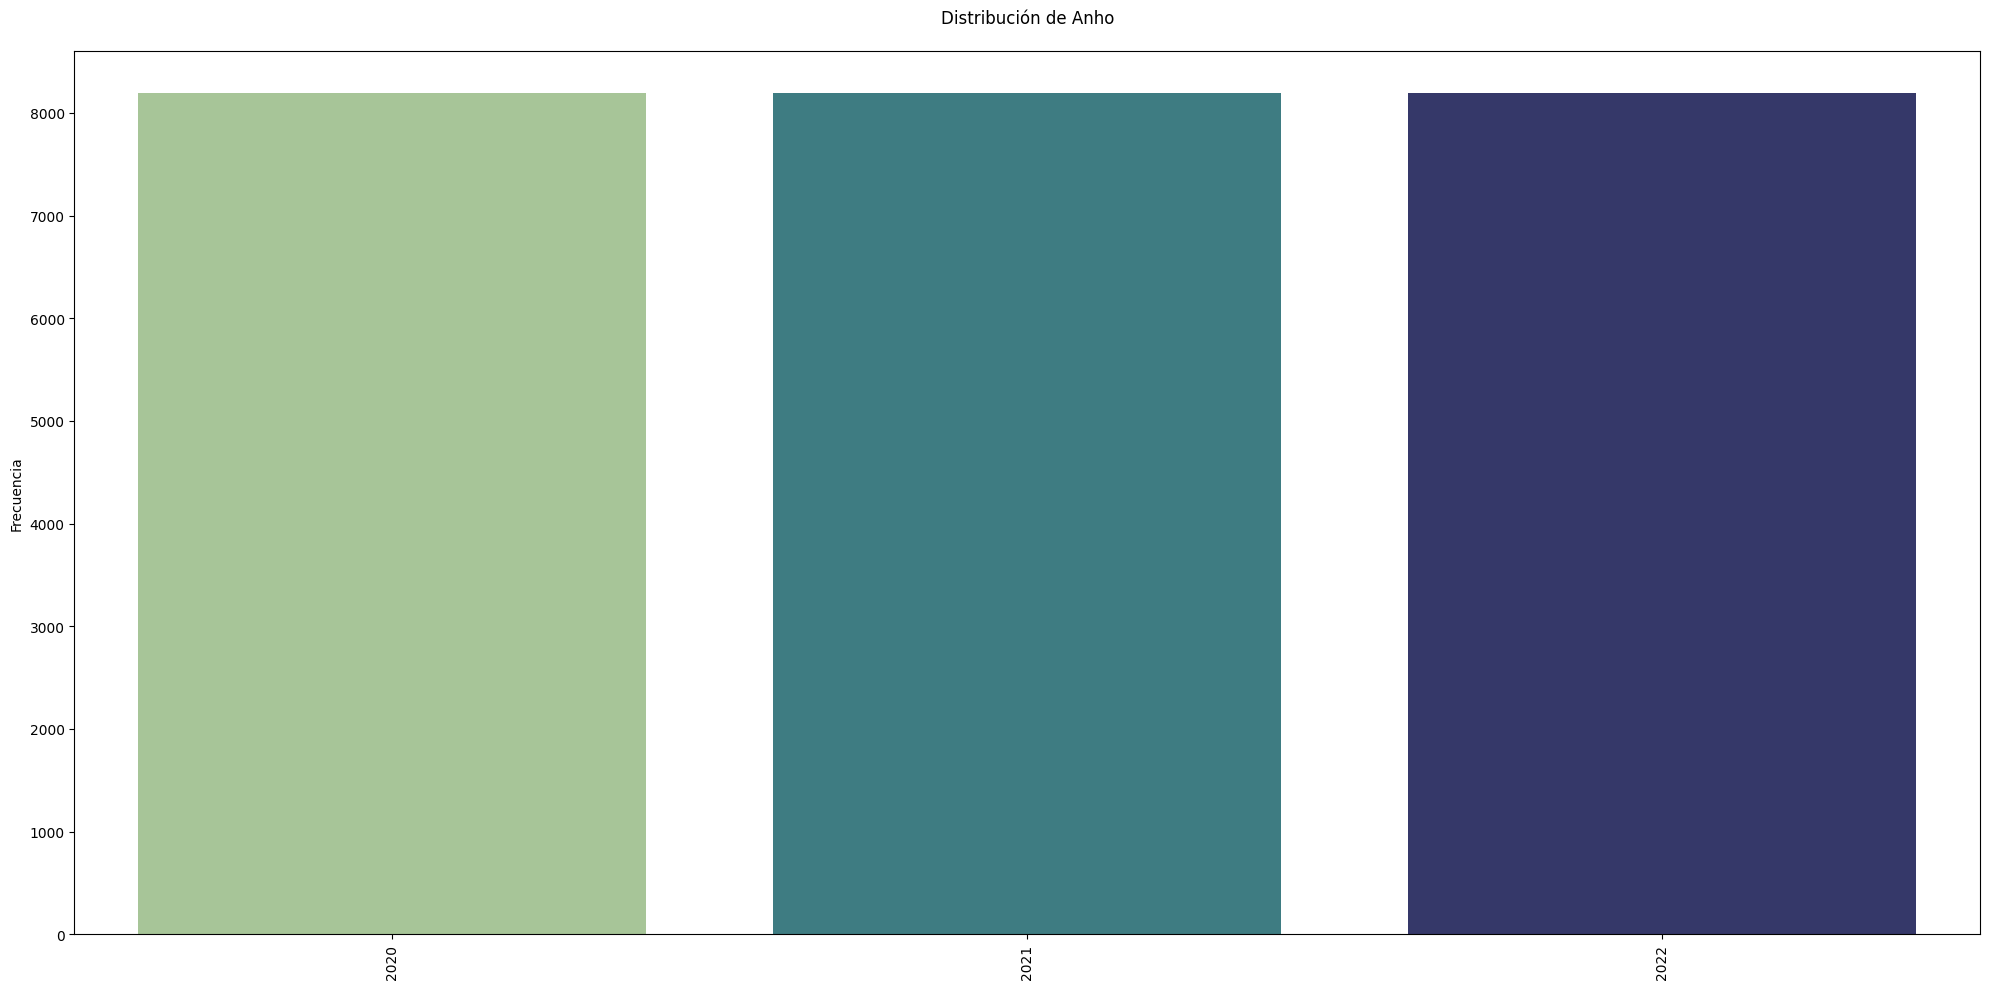

In [110]:
barras_frecuencias(dgt,"Anho")

In [111]:
# Municipio
dgt.Municipio

0        Alava ( municipio sin especificar)
1                          Alegría-Dulantzi
2                                   Amurrio
3                                   Aramaio
4                                Artziniega
                        ...                
24583                                  Biel
24584                              Marracos
24585                 Villamayor de Gállego
24586                                 Ceuta
24587                               Melilla
Name: Municipio, Length: 24588, dtype: object

In [112]:
dgt[dgt['Anho'] == 2022].groupby('Municipio')['Municipio'].apply(lambda x: x[x.str.contains('sin especificar', case=False)]).value_counts()

Municipio
Alava ( municipio sin especificar)                     1
Santa Cruz de Tenerife ( municipio sin especificar)    1
Madrid ( municipio sin especificar)                    1
Malaga ( municipio sin especificar)                    1
Murcia ( municipio sin especificar)                    1
                                                      ..
Guadalajara ( municipio sin especificar)               1
Guipuzcoa ( municipio sin especificar)                 1
Huelva ( municipio sin especificar)                    1
Huesca ( municipio sin especificar)                    1
Zaragoza ( municipio sin especificar)                  1
Name: count, Length: 63, dtype: int64

In [113]:
dgt.Municipio.value_counts().value_counts()

count
3    8162
6      17
Name: count, dtype: int64

In [114]:
dgt.Municipio.value_counts().nlargest(20)

Municipio
Torrent                       6
Sobrado                       6
Moya                          6
Sancti-Spíritus               6
Sada                          6
Arroyomolinos                 6
Rebollar                      6
Zarza, La                     6
Castejón                      6
Mieres                        6
Campillo, El                  6
Villaescusa                   6
Cieza                         6
Fonfría                       6
Villanueva de los Infantes    6
Cabanes                       6
Molar, El                     6
Campillo de Azaba             3
Canillas de Abajo             3
Candelario                    3
Name: count, dtype: int64

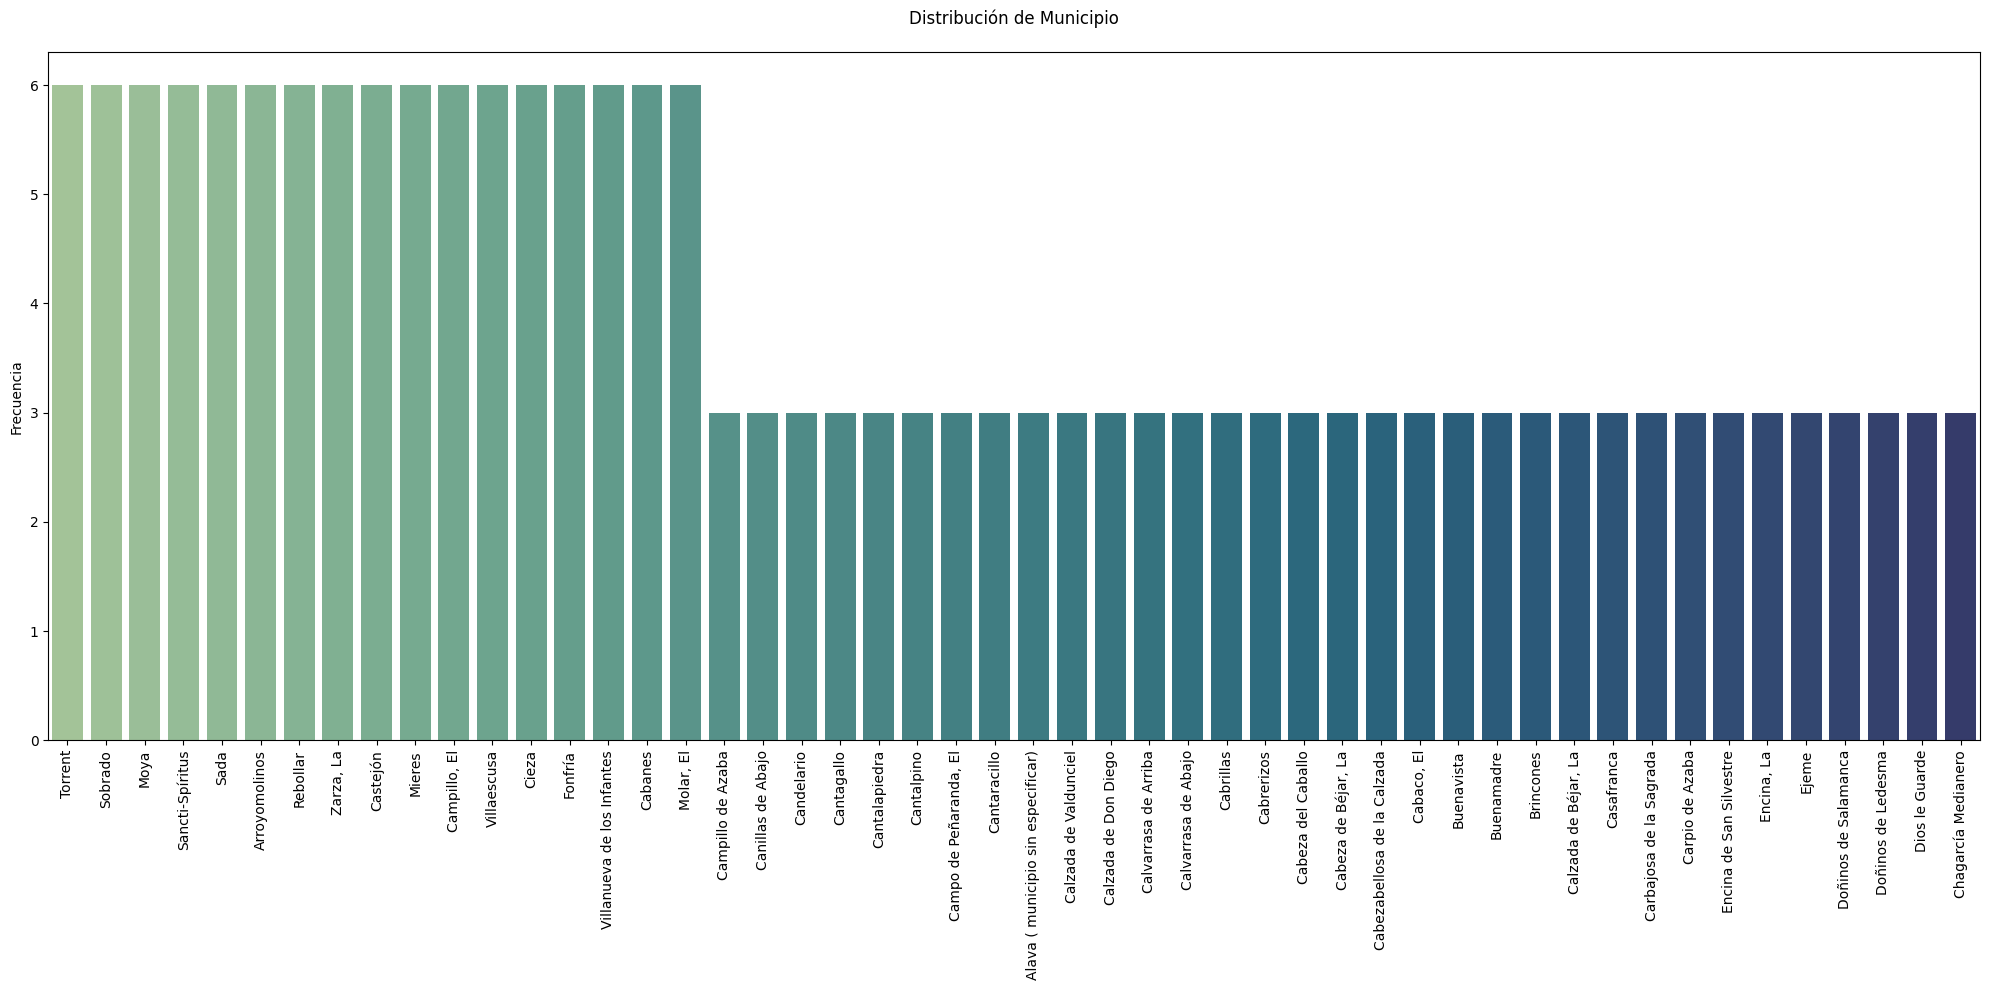

In [115]:
barras_frecuencias(dgt,"Municipio",tamaño=50)

In [116]:
# Provincia
dgt.Provincia.value_counts()

Provincia
Burgos                    1116
Salamanca                 1089
Barcelona                  936
Zaragoza                   882
Guadalajara                867
Navarra                    819
Valencia/València          801
Ávila                      747
Zamora                     747
Cuenca                     717
Teruel                     711
Lleida                     696
Valladolid                 678
Cáceres                    672
Girona                     666
León                       636
Segovia                    630
Toledo                     615
Huesca                     609
Palencia                   576
Tarragona                  555
Soria                      552
Madrid                     540
Rioja (La)                 525
Granada                    525
Badajoz                    498
Alicante/Alacant           426
Castellón/Castelló         408
Bizkaia                    339
Sevilla                    321
Almería                    312
Málaga                     31

In [117]:
resultados_provincia = dgt['Provincia'].value_counts()

# Verificar si todos los valores son divisibles por 3
all(valor % 3 == 0 for valor in resultados_provincia)

True

In [118]:
dgt.Provincia.value_counts().describe()

count      52.000000
mean      472.846154
std       273.849779
min         3.000000
25%       258.750000
50%       462.000000
75%       673.500000
max      1116.000000
Name: count, dtype: float64

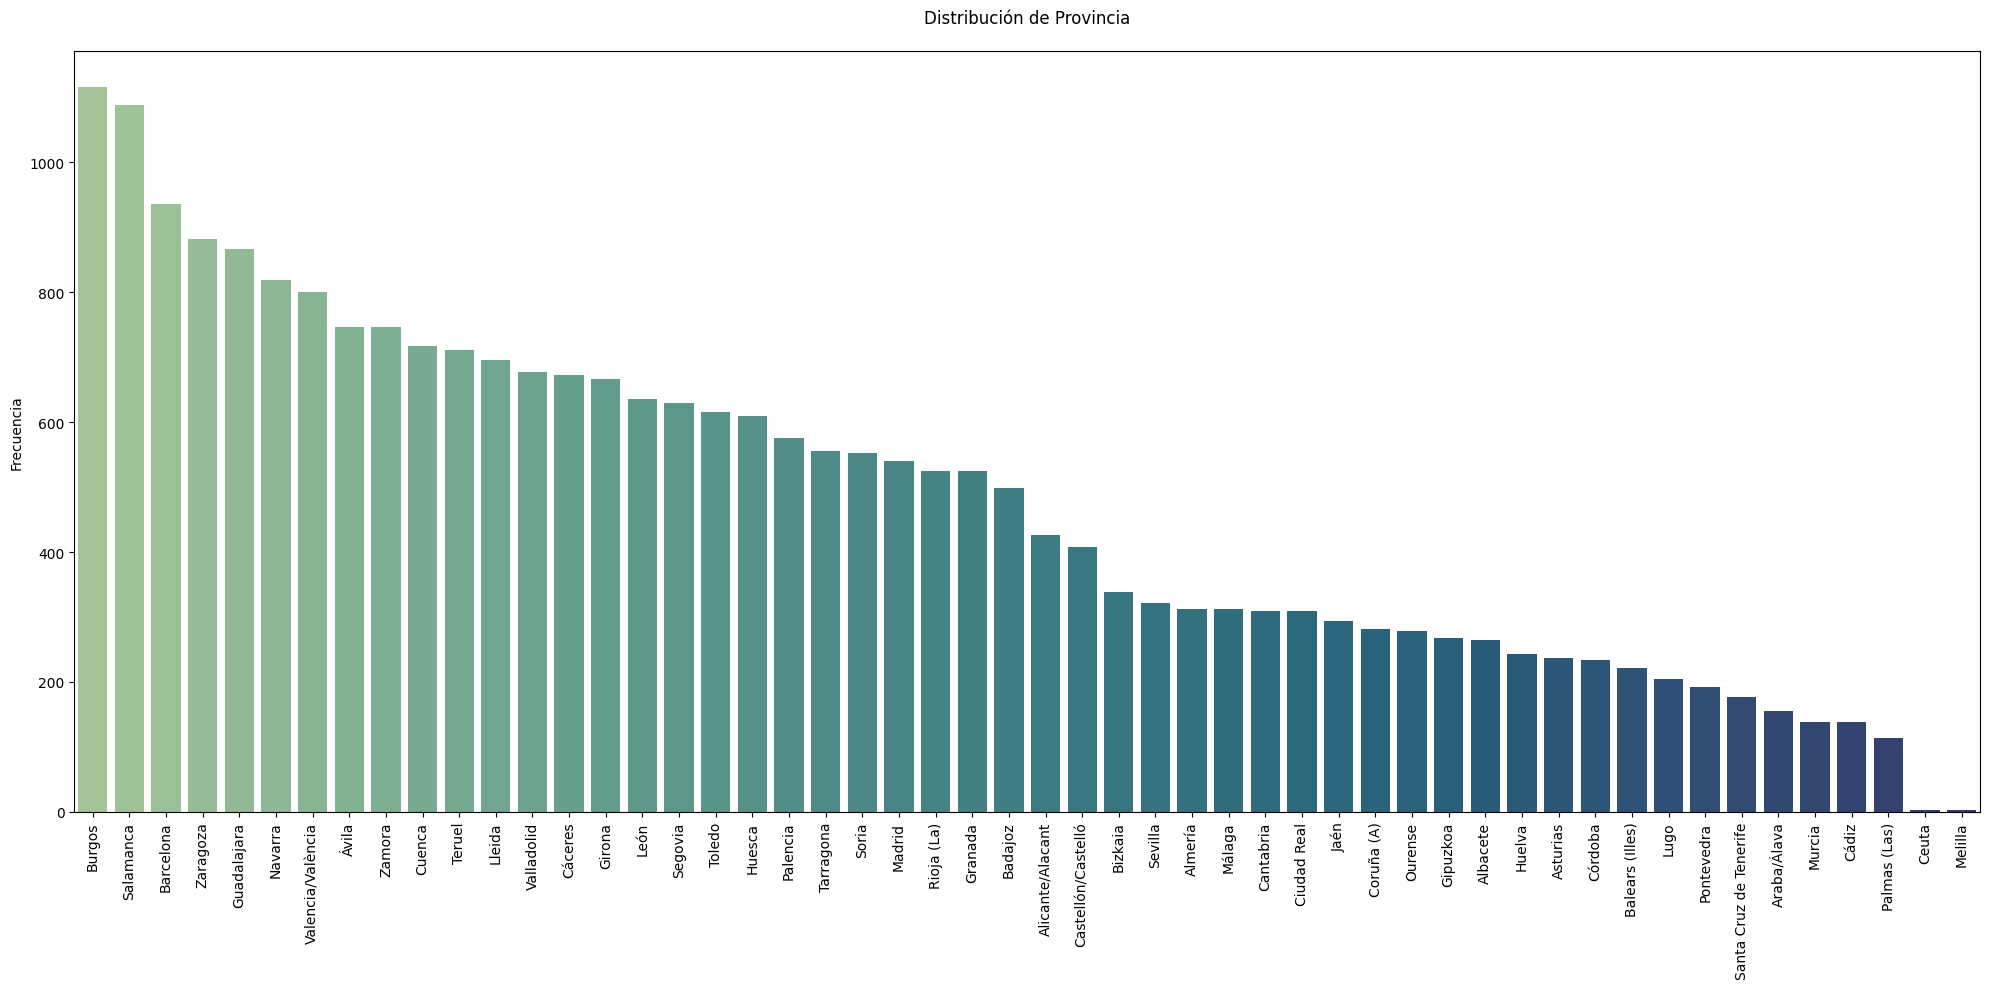

In [119]:
barras_frecuencias(dgt,"Provincia")

In [120]:
# Comunidad Autónoma
dgt["Comunidad Autónoma"].value_counts()

Comunidad Autónoma
Castilla y León                 6771
Cataluña                        2853
Castilla-La Mancha              2772
Andalucía                       2379
Aragón                          2202
Comunitat Valenciana            1635
Extremadura                     1170
Galicia                          957
Navarra (Comunidad Foral de)     819
País Vasco                       762
Madrid (Comunidad de)            540
Rioja (La)                       525
Cantabria                        309
Canarias                         291
Asturias (Principado de)         237
Balears (Illes)                  222
Murcia (Región de)               138
Ceuta                              3
Melilla                            3
Name: count, dtype: int64

In [121]:
dgt["Comunidad Autónoma"].describe()

count               24588
unique                 19
top       Castilla y León
freq                 6771
Name: Comunidad Autónoma, dtype: object

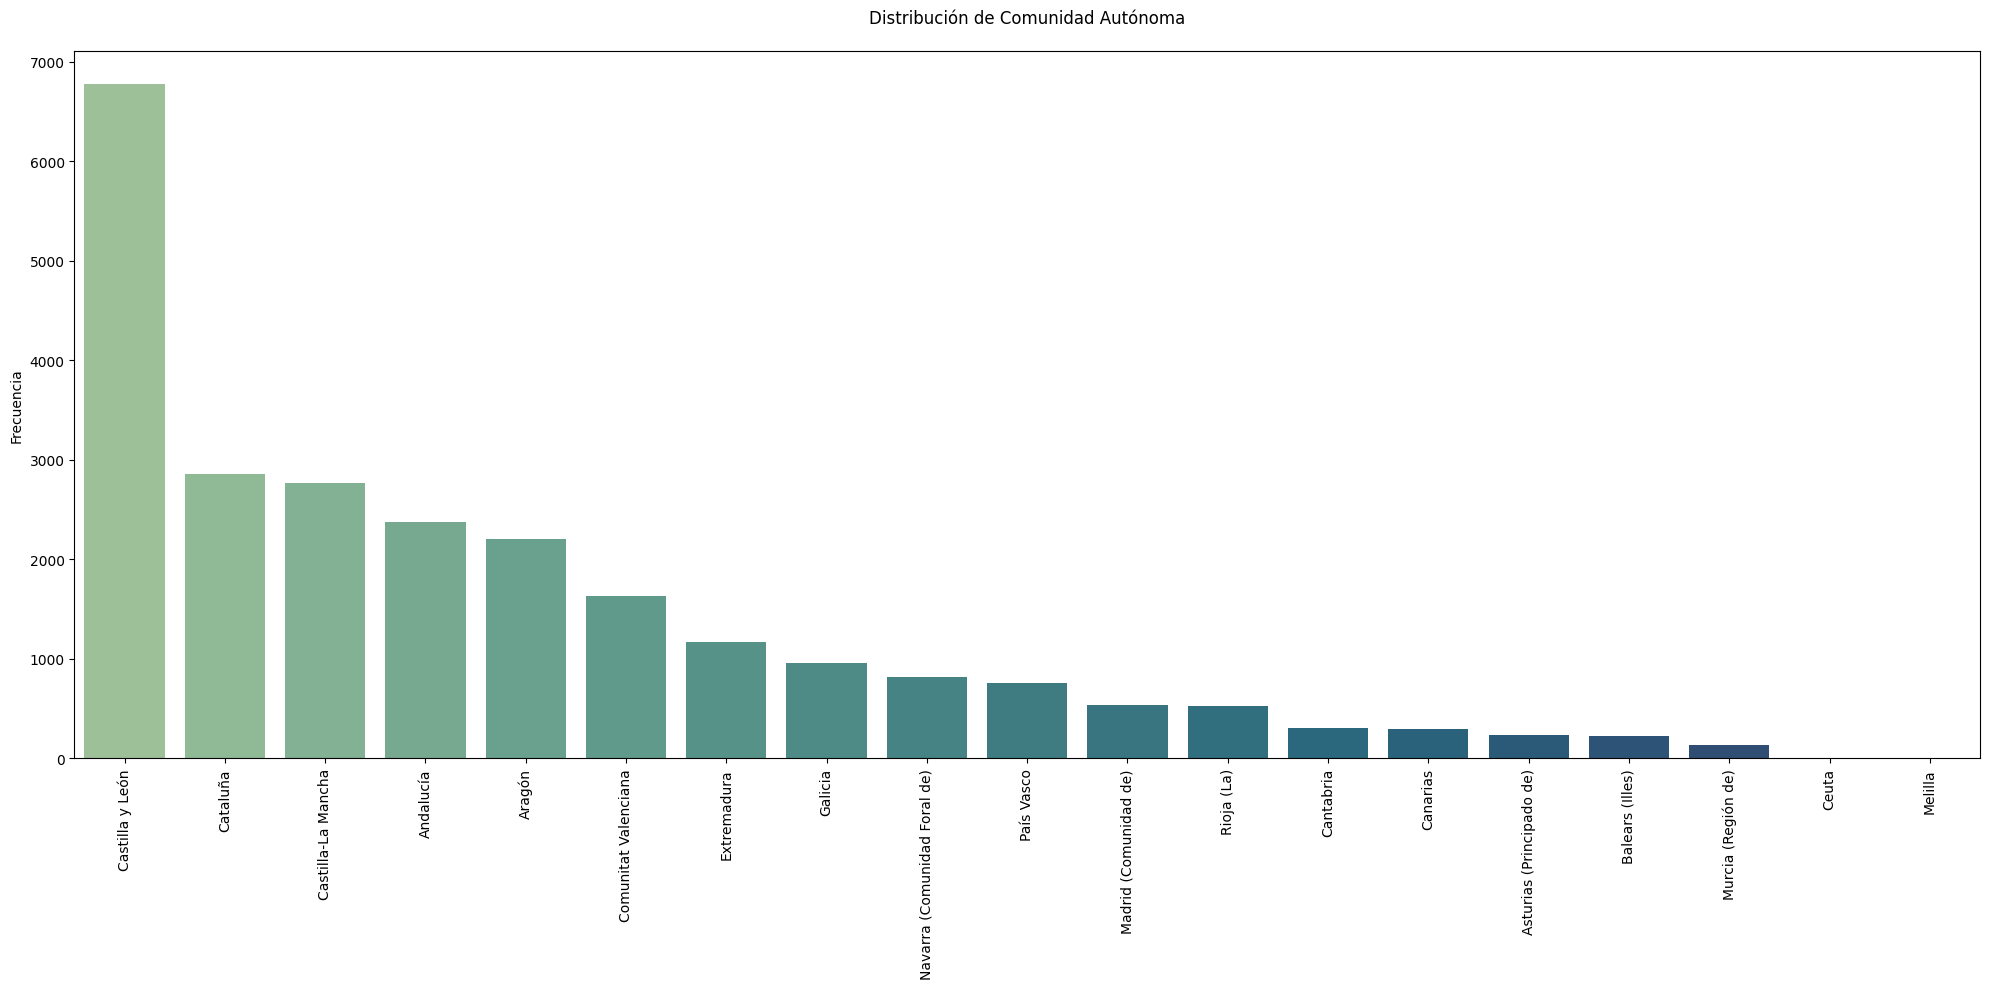

In [122]:
barras_frecuencias(dgt,"Comunidad Autónoma")

RESUMEN CATEGORICAS

**Anho**: Se puede observar que para todos los años, los 3, tienen la misma cantidad de filas, 8196. Más adelante se usará para ver como ha evolucionado, las variables que comparemos con el tiempo. No es necesario ver la distribución relativa.

**Municipio**: Lo primero que podemos ver es que entre los municipios, aparecen valores sin espeficicar, que coinciden con las provincias más las islas, 63 filas por año. Tambien observamos que la media de filas por municipio es de 3, lo que tiene sentido ya que hay 3 años incluidos. Algunos municipios, se repiten en nombre por eso duplican sus filas. Son 17 municipios: 

``Torrent, Sobrado, Moya, Sancti-Spíritus, Sada, Arroyomolinos, Rebollar, La Zarza, Castejón, Mieres, El Campillo, Villaescusa, Cieza, Fonfría, Villanueva de los Infantes, Cabanes, El Molar``

**Provincia**: En las provincias nos aparecen las 50 provincias más 2 ciudades que son Ceuta y Melilla. Éstas, tienen solo 3 filas de datos siendo las que menos tienen, mientras que por su parte Burgos, es la que más municipios alberga con 1116. La media es de 472 municipios. Además se comprueba que todas los valores de cada provincia, es multiplo de 3, para confirmar que todos los dato son consistentes.

**Comunidad Autónoma**: Aquí observamos que aparecen 17 comunidades (incluidas Canarias y Baleares) más las 2 ciudades autónomas de Ceuta y Melilla. Se observa una gran diferencia entre Castilla y León y el resto de comunidades. Comprobaremos más adelante si la población es proporcional al número de municipios, aunque suponemos que no.

#### NUMÉRICAS CONTINUAS

En esta sección analizaré la antigüedad media del parque, de ciclomotores, de motocicletas, de turismos, furgonetas y camiones. En total 6 variables numéricas continuas.

In [123]:
# Antigüedad Media del Parque (<25 años)
dgt["Antigüedad Media del Parque (<25 años)"].describe().round(2)

count    24588.00
mean        13.79
std          1.55
min          1.95
25%         12.90
50%         13.93
75%         14.78
max         24.59
Name: Antigüedad Media del Parque (<25 años), dtype: float64

In [124]:
# Calculo los bigotes con un k=1.5
outliers(dgt,"Antigüedad Media del Parque (<25 años)")

Lim. Superior: 17.6, Lim. Inferior: 10.08.
Numero de datos por encima: 105, numero de datos por debajo: 264.
Numero de datos fuera de límites: 369


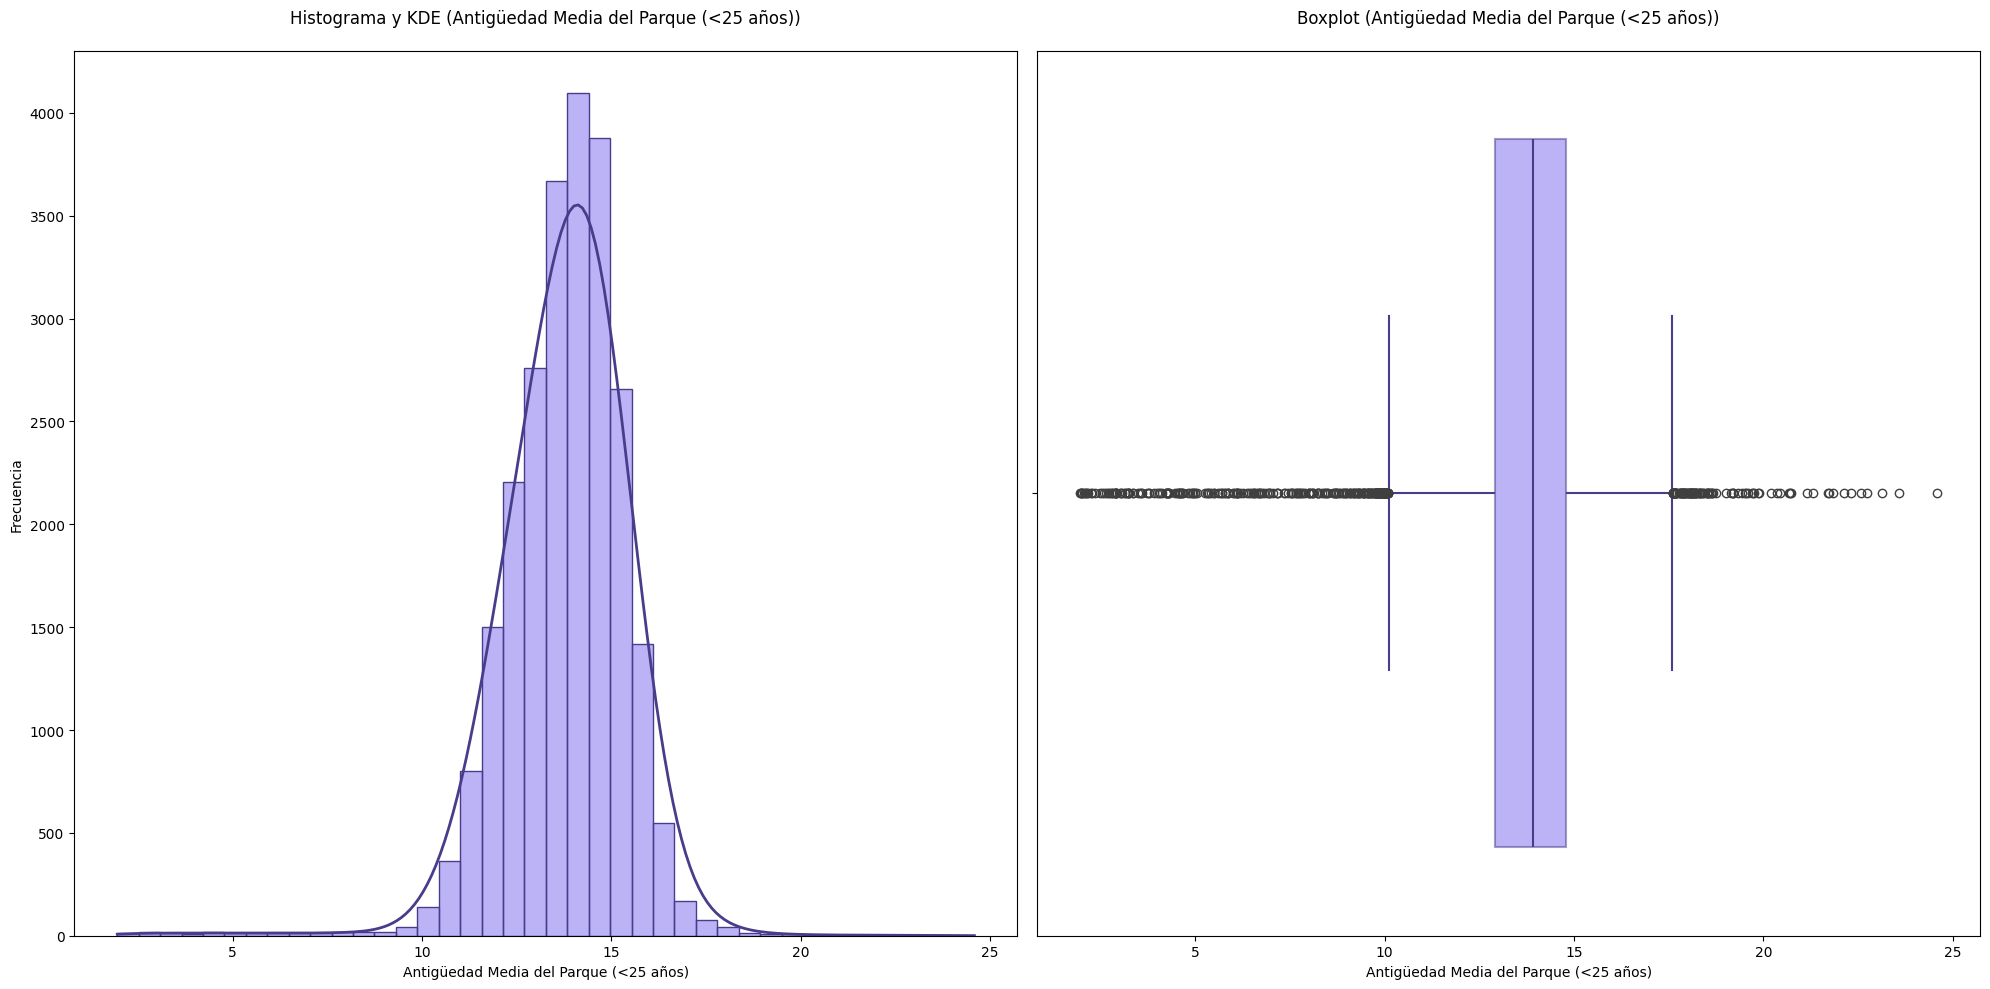

In [125]:
histo_box(dgt,"Antigüedad Media del Parque (<25 años)")

In [126]:
# Antigüedad Media de Ciclomotores
dgt["Antigüedad Media de Ciclomotores"].describe().round(2)

count    24588.00
mean        18.61
std          1.90
min          0.18
25%         17.67
50%         18.61
75%         19.73
max         24.48
Name: Antigüedad Media de Ciclomotores, dtype: float64

In [127]:
outliers(dgt,"Antigüedad Media de Ciclomotores")

Lim. Superior: 22.82, Lim. Inferior: 14.58.
Numero de datos por encima: 198, numero de datos por debajo: 619.
Numero de datos fuera de límites: 817


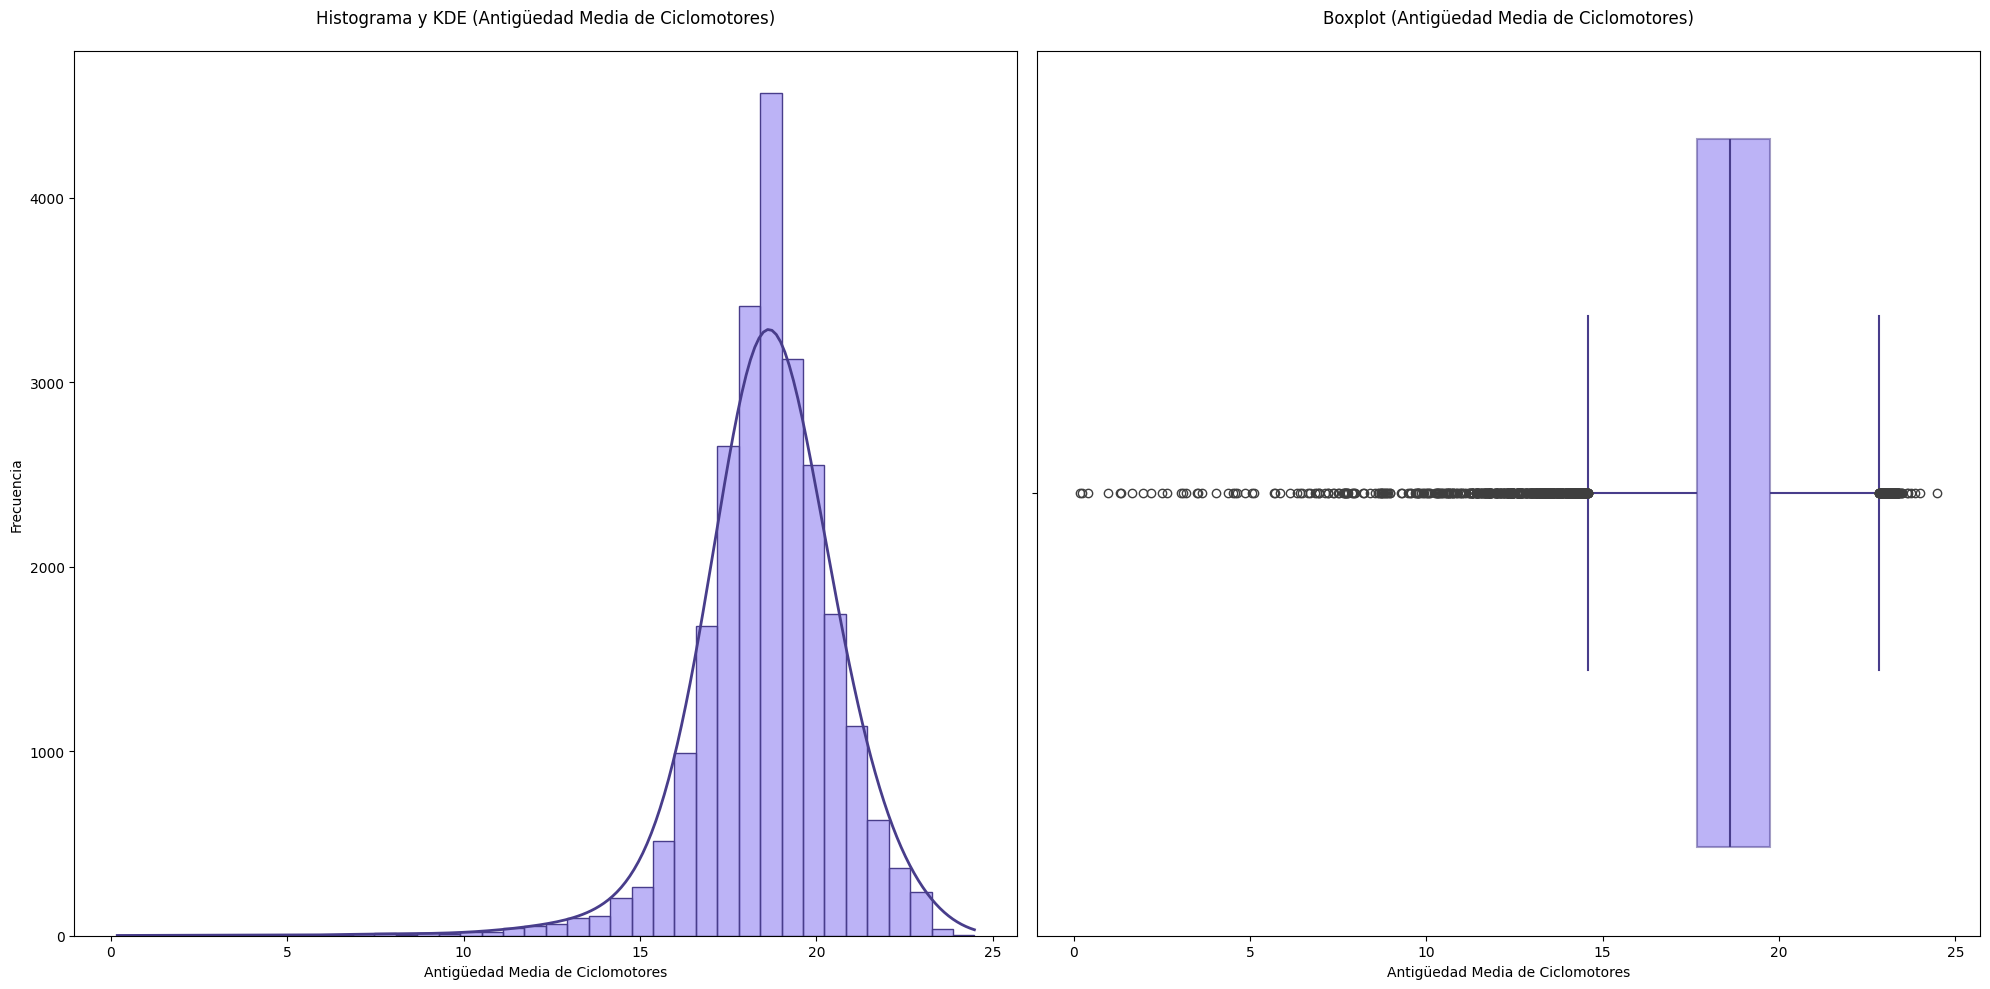

In [128]:
histo_box(dgt,"Antigüedad Media de Ciclomotores")

In [129]:
# Antigüedad Media de Motocicletas
dgt["Antigüedad Media de Motocicletas"].describe().round(2)

count    24588.00
mean        12.20
std          2.23
min          0.05
25%         10.97
50%         12.10
75%         13.26
max         24.94
Name: Antigüedad Media de Motocicletas, dtype: float64

In [130]:
outliers(dgt,"Antigüedad Media de Motocicletas")

Lim. Superior: 16.69, Lim. Inferior: 7.54.
Numero de datos por encima: 778, numero de datos por debajo: 472.
Numero de datos fuera de límites: 1250


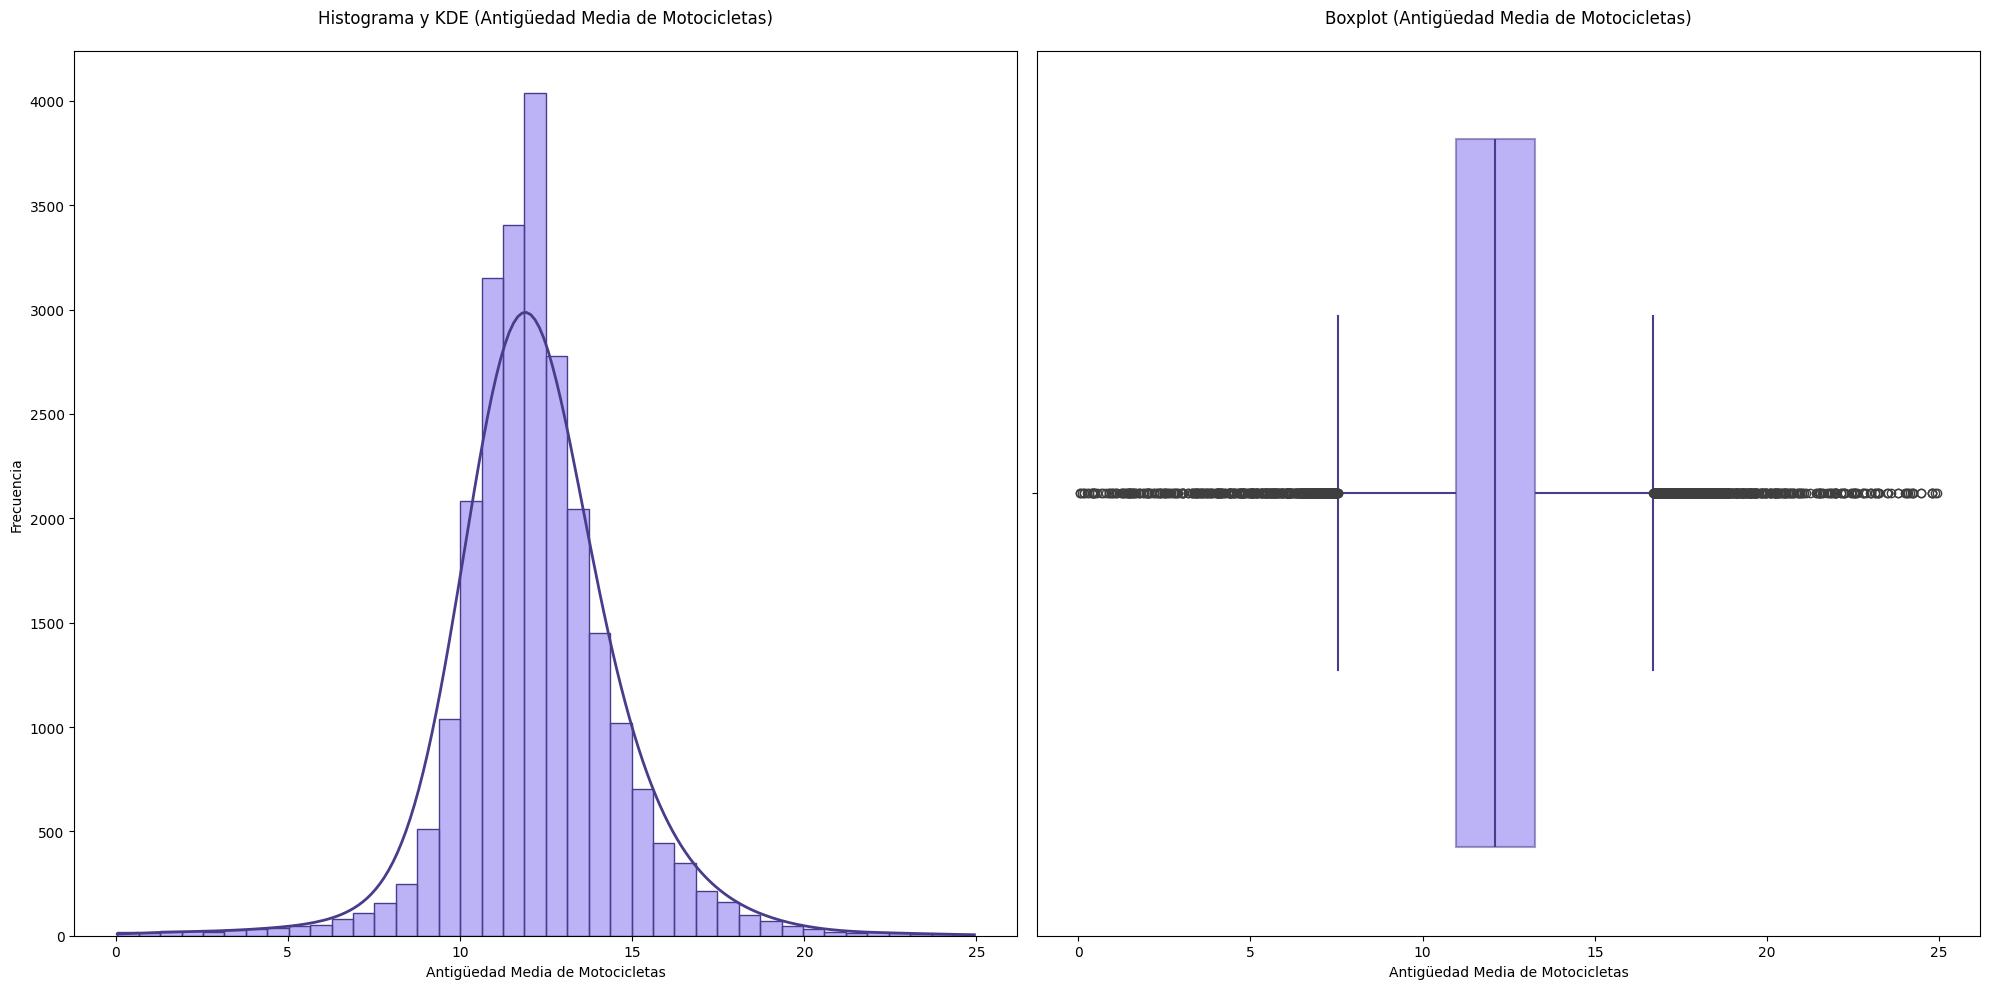

In [131]:
histo_box(dgt,"Antigüedad Media de Motocicletas")

In [132]:
# Antigüedad Media de Turismos
dgt["Antigüedad Media de Turismos"].describe().round(2)

count    24588.00
mean        13.10
std          1.53
min          1.66
25%         12.15
50%         13.16
75%         14.07
max         24.59
Name: Antigüedad Media de Turismos, dtype: float64

In [133]:
outliers(dgt,"Antigüedad Media de Turismos")

Lim. Superior: 16.96, Lim. Inferior: 9.27.
Numero de datos por encima: 135, numero de datos por debajo: 182.
Numero de datos fuera de límites: 317


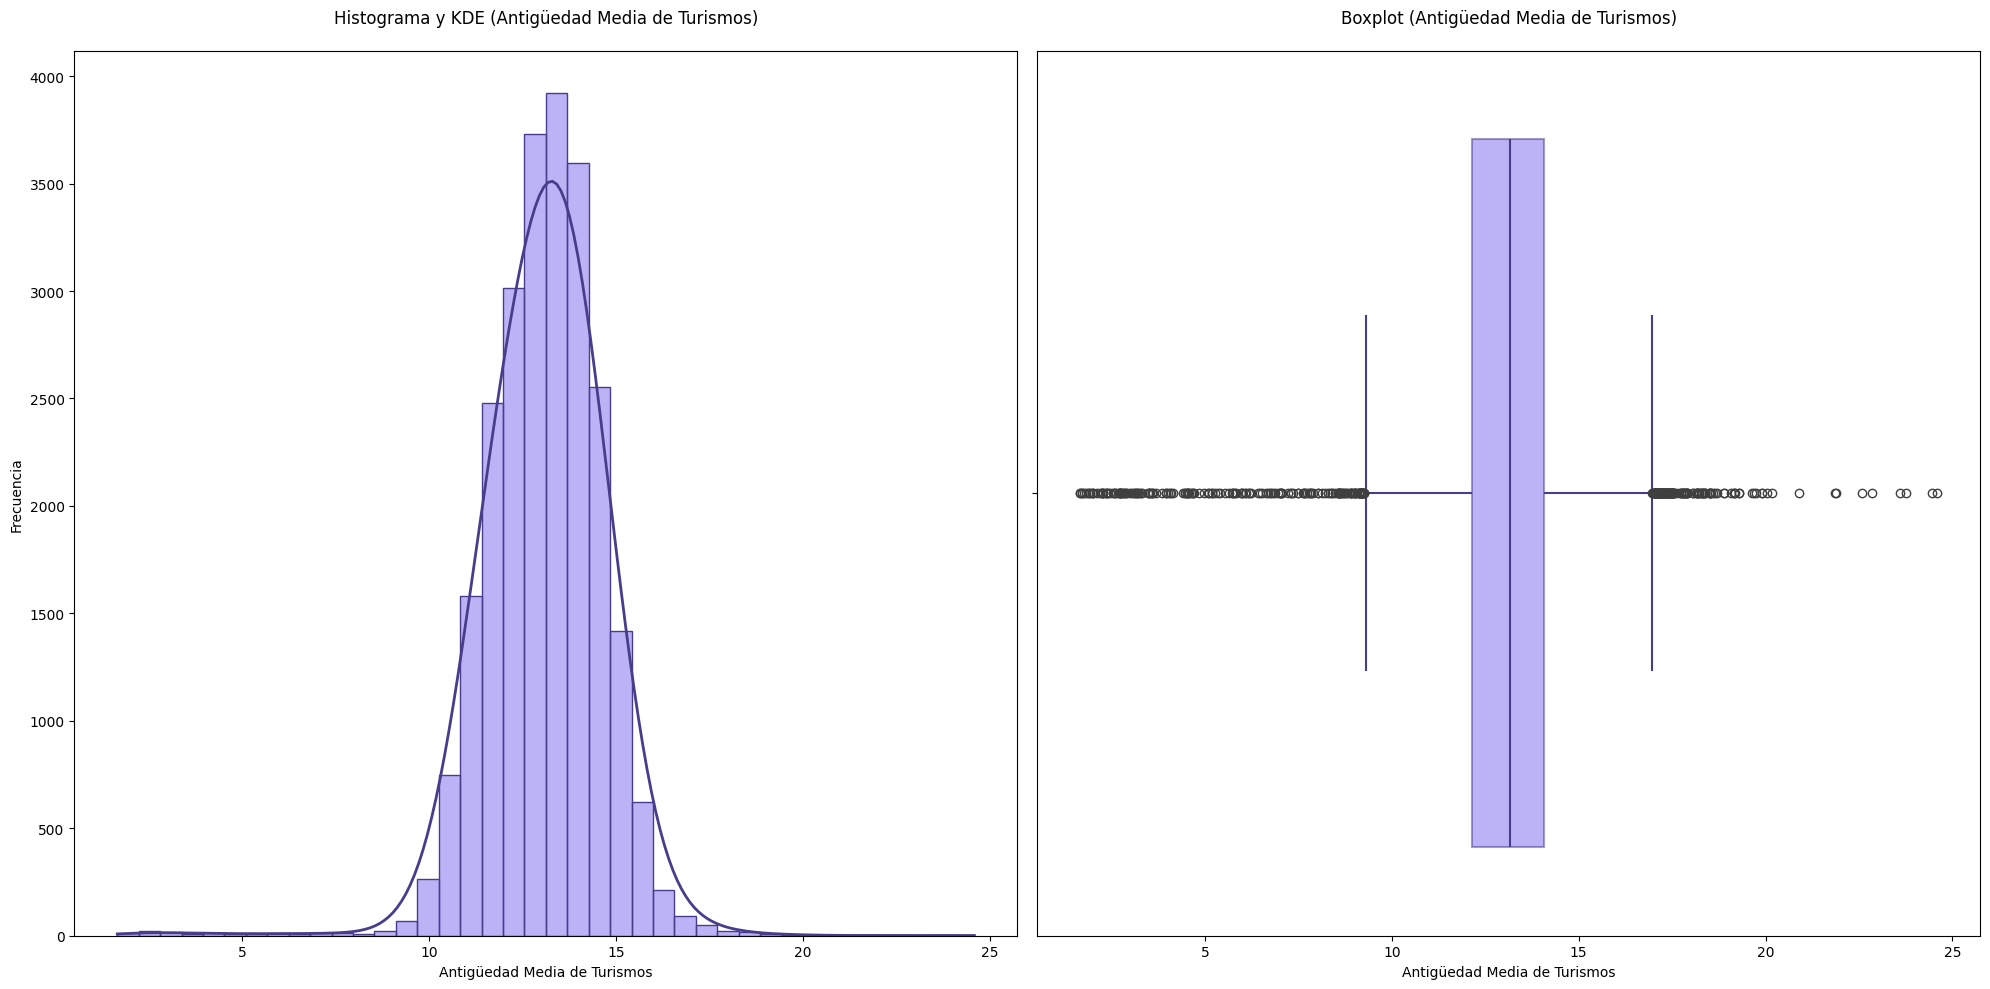

In [134]:
histo_box(dgt,"Antigüedad Media de Turismos")

In [135]:
# Antigüedad Media de Furgonetas
dgt["Antigüedad Media de Furgonetas"].describe().round(2)

count    24588.00
mean        14.82
std          2.83
min          0.54
25%         13.00
50%         14.84
75%         16.70
max         24.98
Name: Antigüedad Media de Furgonetas, dtype: float64

In [136]:
outliers(dgt,"Antigüedad Media de Furgonetas")

Lim. Superior: 22.26, Lim. Inferior: 7.44.
Numero de datos por encima: 168, numero de datos por debajo: 242.
Numero de datos fuera de límites: 410


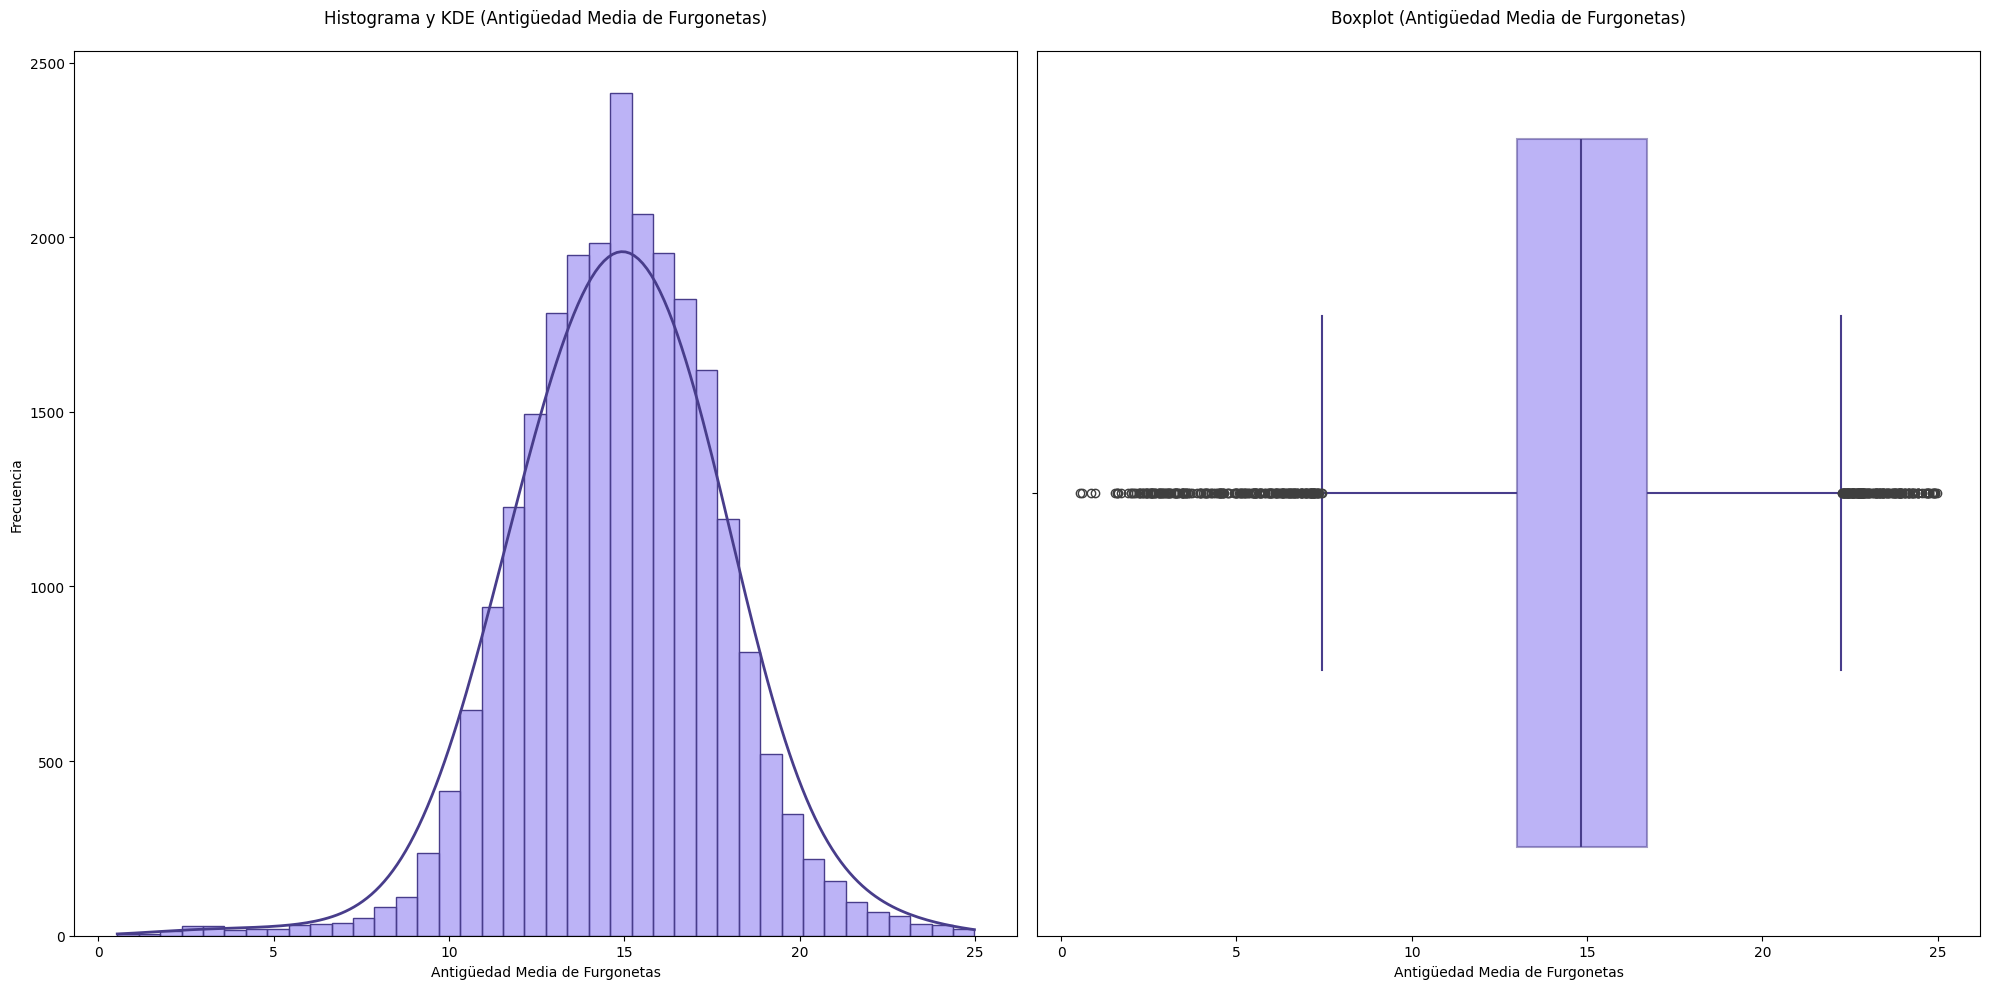

In [137]:
histo_box(dgt,"Antigüedad Media de Furgonetas")

In [138]:
# Antigüedad Media de Camiones
dgt["Antigüedad Media de Camiones"].describe().round(2)

count    24588.00
mean        15.39
std          2.10
min          0.54
25%         14.35
50%         15.39
75%         16.47
max         24.71
Name: Antigüedad Media de Camiones, dtype: float64

In [139]:
outliers(dgt,"Antigüedad Media de Camiones")

Lim. Superior: 19.64, Lim. Inferior: 11.18.
Numero de datos por encima: 600, numero de datos por debajo: 605.
Numero de datos fuera de límites: 1205


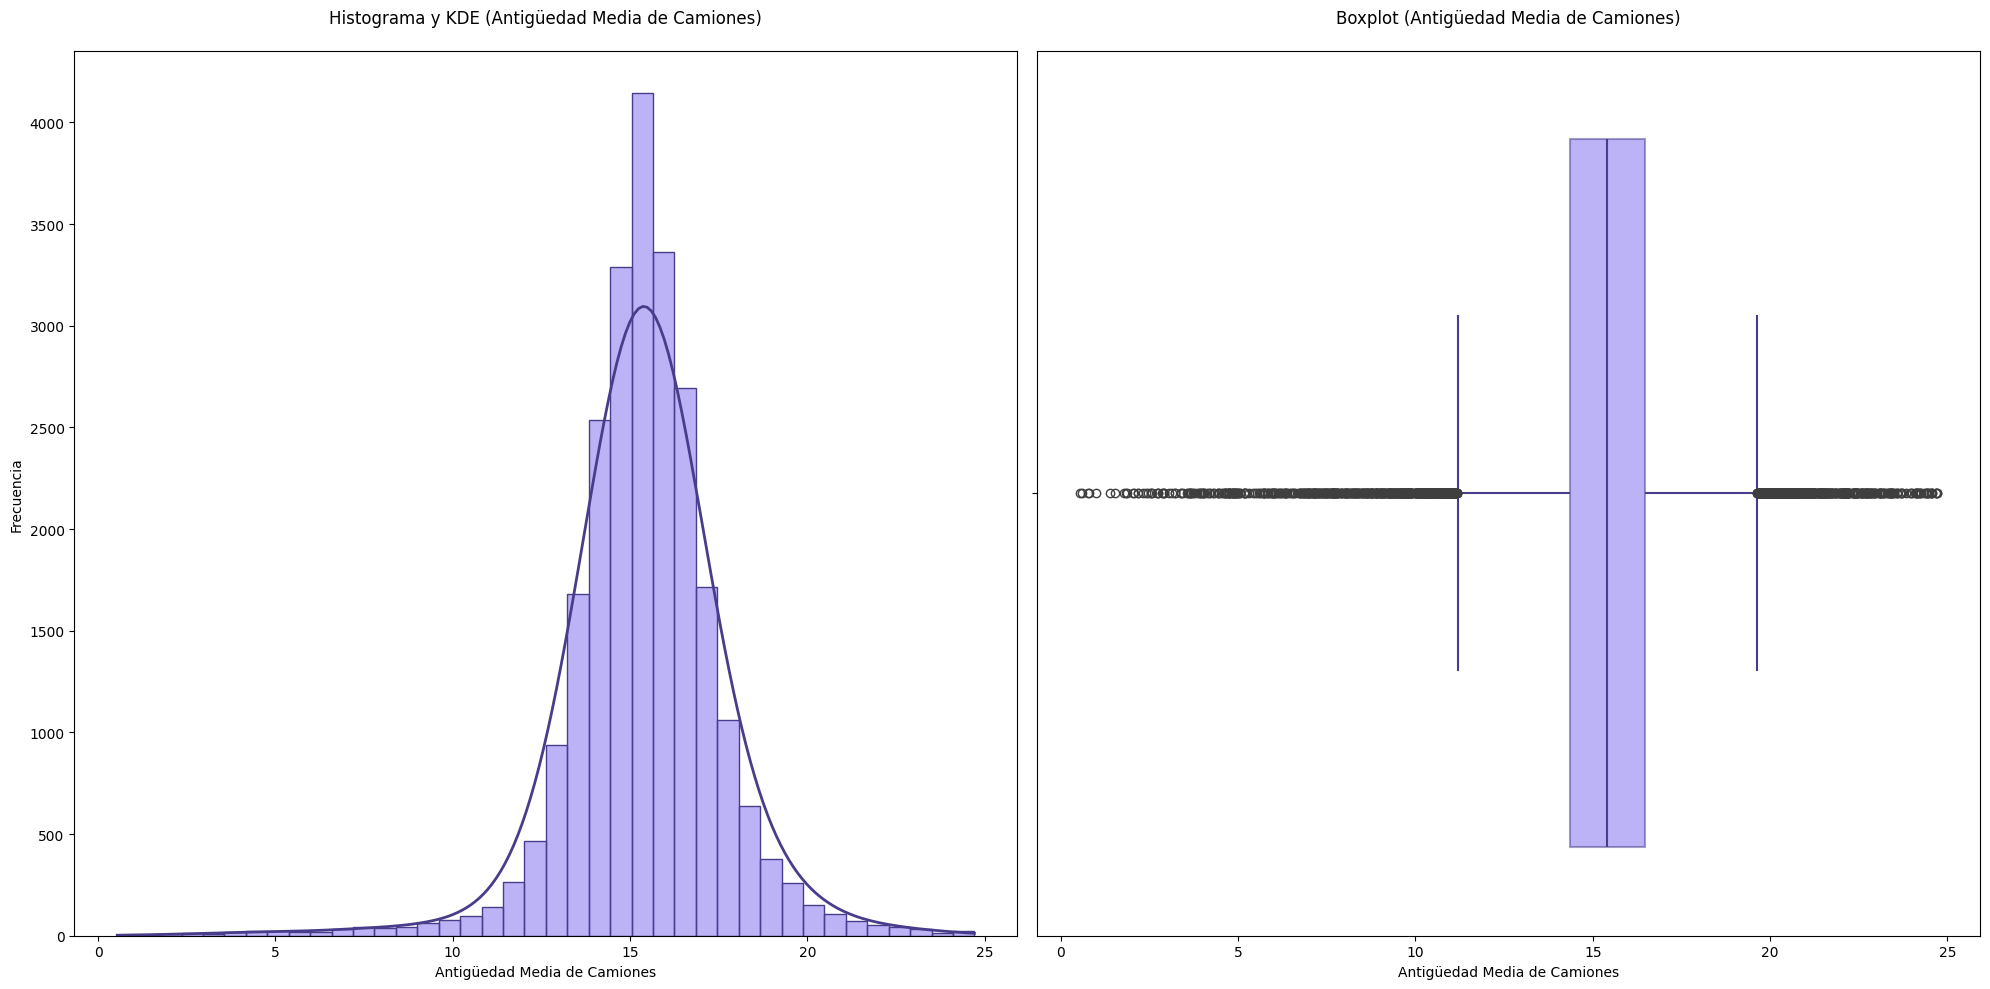

In [140]:
histo_box(dgt,"Antigüedad Media de Camiones")

RESUMEN NUMERICAS CONTINUAS

**Antigüedad Media del Parque (<25 años)**: El conjunto de vehículos tiene una media de 13.79 años. Los datos presentan una baja desviación y una distribución muy centrada.
Podemos apreciar que hay outliers que representan a los municipios que están por debajo de 10 años (264) y por encima de 17.6 (105).

**Antigüedad Media de Ciclomotores**: La antigüedad media de los ciclomotores es de 18.61 años. El conjunto de datos presenta una agrupación centrada en torno al valor medio. En este caso sus outliers por debajo del limite de 14.6 años son muchos, esto se ve en el gráfico de caja en la larga cola que deja.

**Antigüedad Media de Motocicletas**: Las motocicletas presentan una antigüedad menor que los ciclomotores, de 12.2 años de media. Tambien se observan datos muy centrados y con una ligera predominancia en el número de datos, antes de la mediana. por la forma desigual del histograma.

**Antigüedad Media de Turismos**: En general la antigüedad de los turismos, es de 13.1 años, siendo muy pequeña la desviacion de edad y con menor distancia entre el Q2-Q1 que entre Q3-Q2.

**Antigüedad Media de Furgonetas** Para las furgonetas la edad media es de 14.8 años y aquí hay una ligera asimetría con mayor distribución en el lado derecho. Su forma tanto en el histograma como en el gráfico de caja, es más ancho, lo que implica mayor desviación de los datos. El pico producido en el centro, se debe a que presentaba muchos valores sin rellenar, que se cubrieron con la media.

**Antigüedad Media de Camiones** La antigüedad media de los camiones es de 15.4. Los datos presentan una poblacion distribuida uniformemente con simetría y poca desviación en general.

Se puede completar el análisis con el repunte que hay en el pico de cada histograma, debido a la gran falta de valores por tratarse de datos faltantes. Esto, explica porqué es tan pronunciado.

Además, suponiendo que, cuanto más nuevo, más seguro es el vehículo (aparentemente). ¿Cómo afecta el número de fallecidos en funcion de la antigüedad? Pregunta que intentaré responder más adelante.

#### NUMÉRICAS DISCRETAS

En esta sección analizaré las columnas de Población Total y Fallecidos ya que el resto de columnas que contienen Fallecidos y Población son sumandos. También haré un repaso general de heridos leves, graves y fallecidos por cada turismo para tener una visión global.

In [141]:
# Fallecidos
dgt["Fallecidos"].value_counts()

Fallecidos
0     23916
1       471
2       108
3        34
4        23
5         8
6         7
7         3
8         3
11        2
9         2
12        2
22        1
28        1
16        1
13        1
24        1
36        1
20        1
44        1
10        1
Name: count, dtype: int64

In [142]:
dgt["Fallecidos"].describe()

count    24588.000000
mean         0.052261
std          0.604811
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         44.000000
Name: Fallecidos, dtype: float64

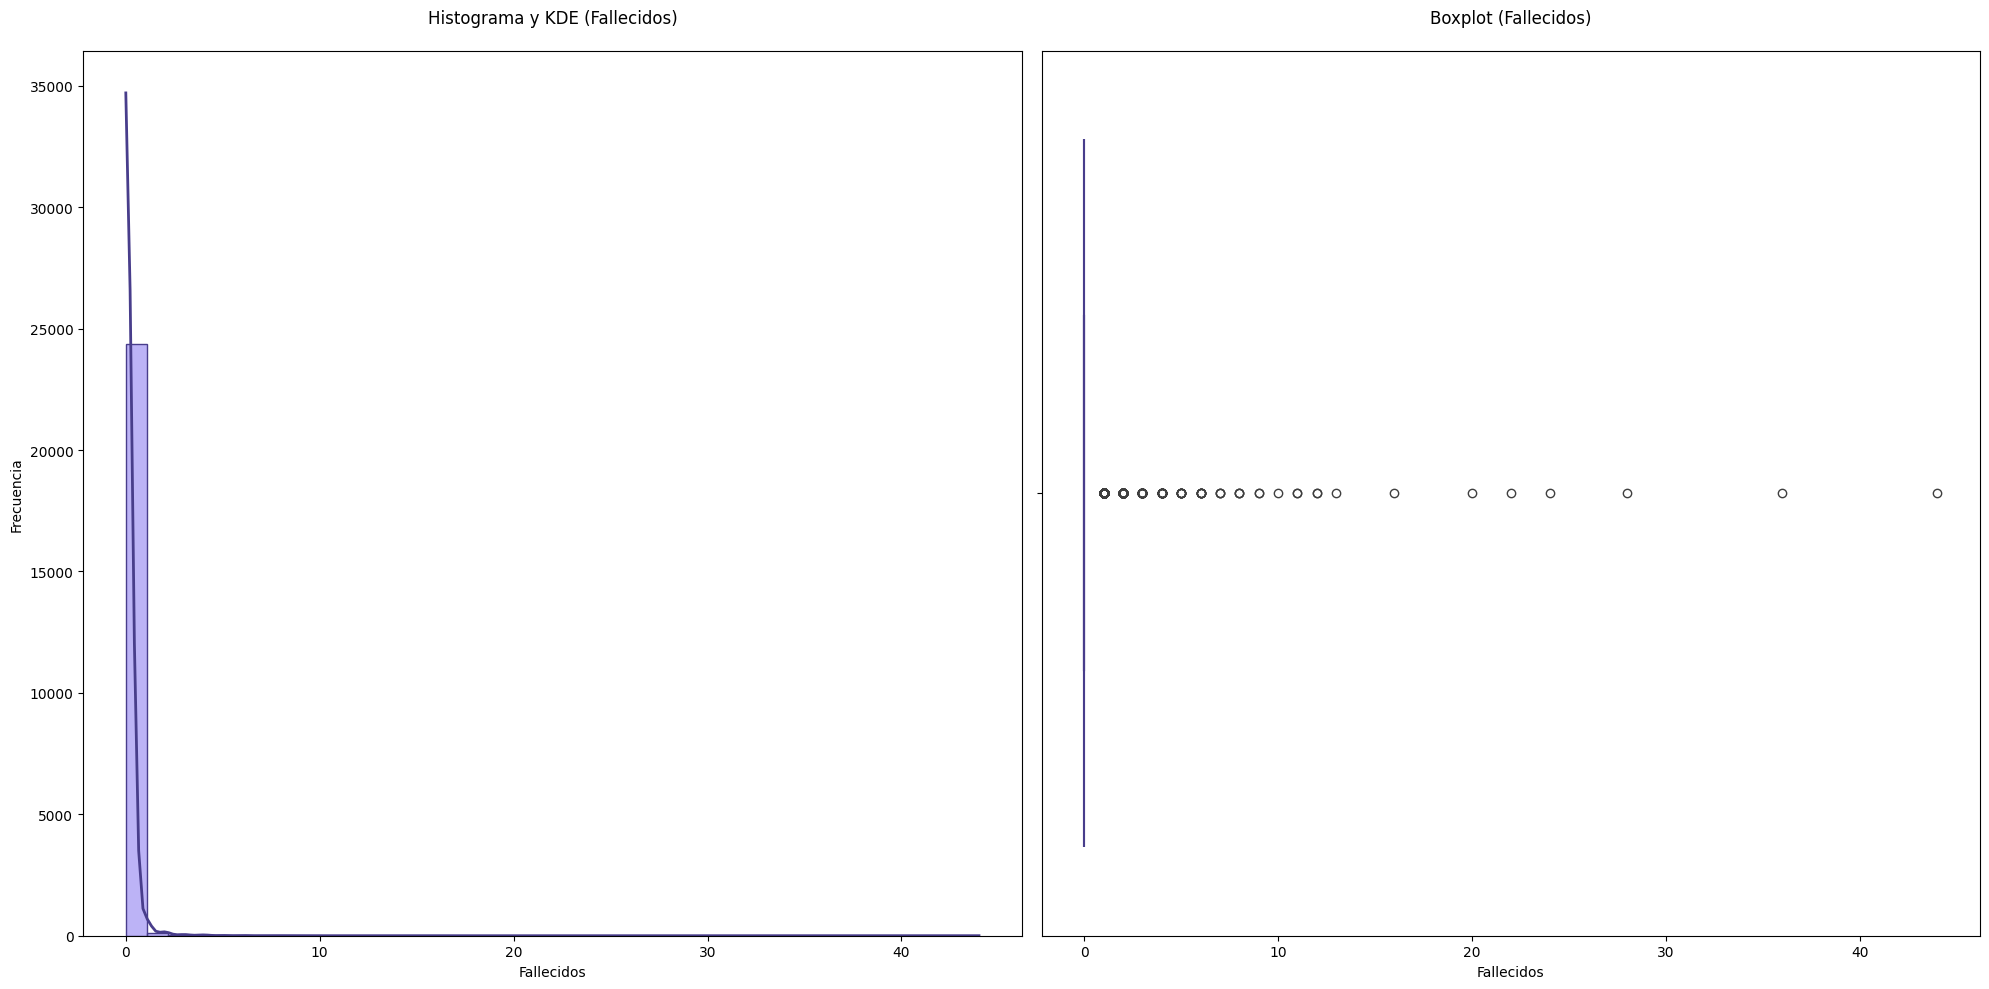

In [143]:
histo_box(dgt,"Fallecidos")

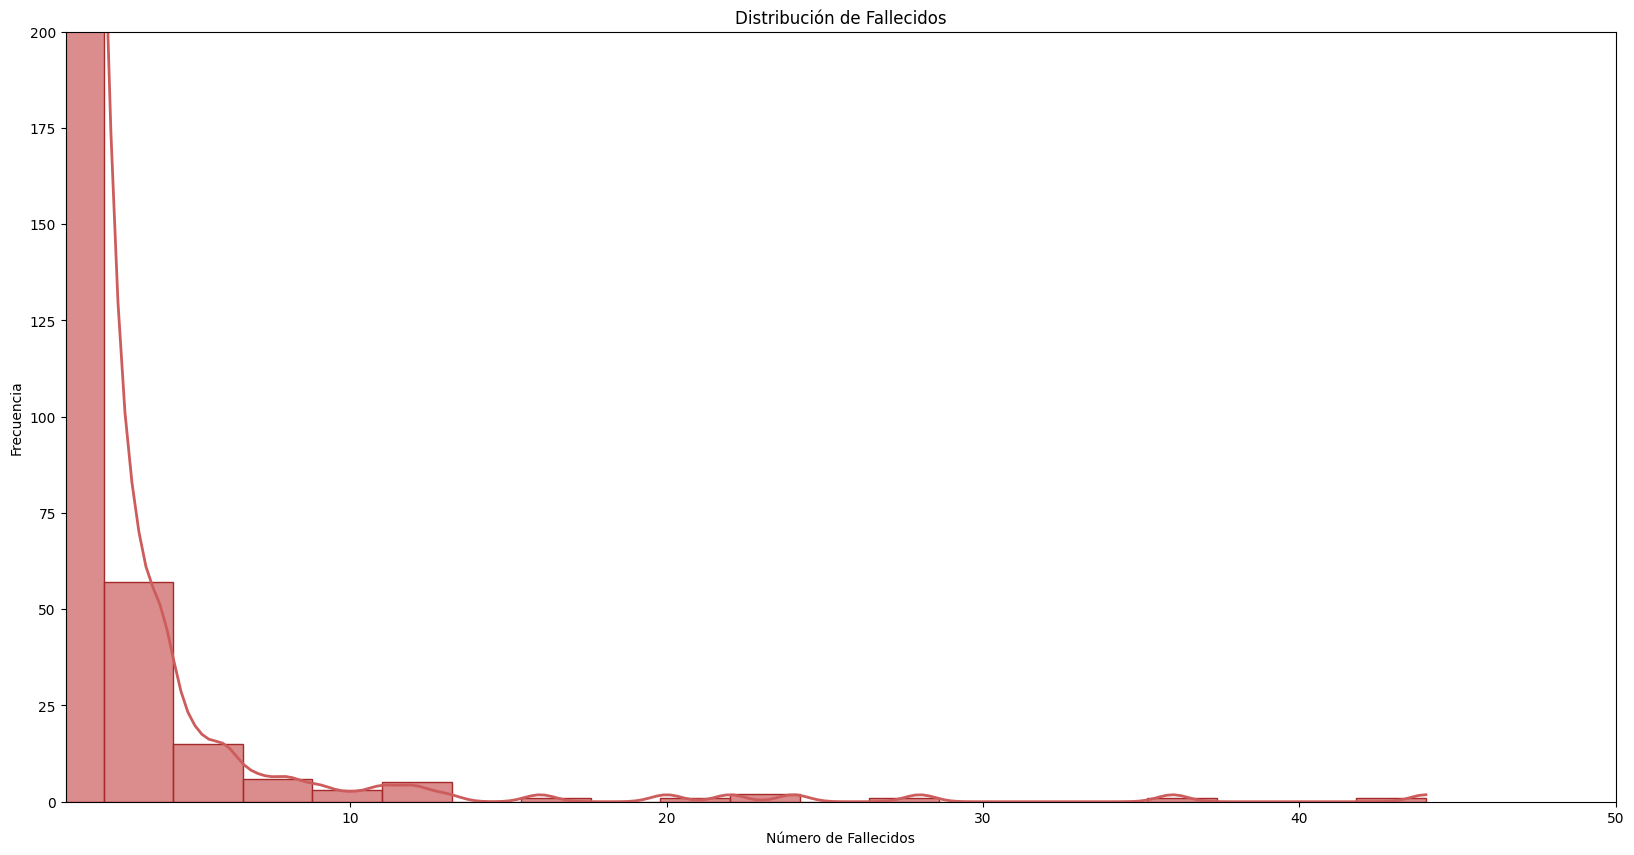

In [144]:
# Hay muy pocos valores distintos de 0, 
# hacemos una nueva grafica para verla en detalle
fallecidos(dgt,kde=True)

In [145]:
# Poblacion Total
dgt.groupby("Anho")["Población Total"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Anho,,,,,,,,
2020,8196.0,5789.51,48107.93,0.0,148.0,509.0,2367.25,3334730.0
2021,8196.0,5781.49,47658.40,0.0,148.0,513.0,2383.50,3305408.0
2022,8196.0,5792.51,47446.82,0.0,148.0,515.0,2393.25,3280782.0


In [146]:
dgt.groupby("Anho")["Población Total"].sum()

Anho
2020    47450795
2021    47385107
2022    47475420
Name: Población Total, dtype: int64

In [147]:
columnas_fallecidos = dgt.filter(like='Fallecidos').columns.tolist()
print(columnas_fallecidos)

['Bicicletas Fallecidos', 'Ciclomotores Fallecidos', 'Motocicletas Fallecidos', 'Turismos Fallecidos', 'Furgonetas Fallecidos', 'Camiones Fallecidos', 'Autobús Fallecidos', 'Otros Fallecidos', 'Peatones Fallecidos', 'Fallecidos']


In [148]:
# Quitamos la última porque ya la hemos visualizado
columnas_fallecidos.pop(-1)

'Fallecidos'

In [149]:
dgt[columnas_fallecidos].sum()

Bicicletas Fallecidos       63
Ciclomotores Fallecidos     50
Motocicletas Fallecidos    349
Turismos Fallecidos        197
Furgonetas Fallecidos       16
Camiones Fallecidos          7
Autobús Fallecidos           8
Otros Fallecidos            46
Peatones Fallecidos        549
dtype: int64

In [150]:
dgt[columnas_fallecidos].describe()

,Bicicletas Fallecidos,Ciclomotores Fallecidos,Motocicletas Fallecidos,Turismos Fallecidos,Furgonetas Fallecidos,Camiones Fallecidos,Autobús Fallecidos,Otros Fallecidos,Peatones Fallecidos
count,24588.000000,24588.000000,24588.000000,24588.000000,24588.000000,24588.000000,24588.000000,24588.000000,24588.000000
mean,0.002562,0.002034,0.014194,0.008012,0.000651,0.000285,0.000325,0.001871,0.022328
std,0.052913,0.047681,0.247001,0.108496,0.027049,0.016871,0.022090,0.045057,0.288522
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,3.000000,16.000000,4.000000,2.000000,1.000000,2.000000,2.000000,21.000000


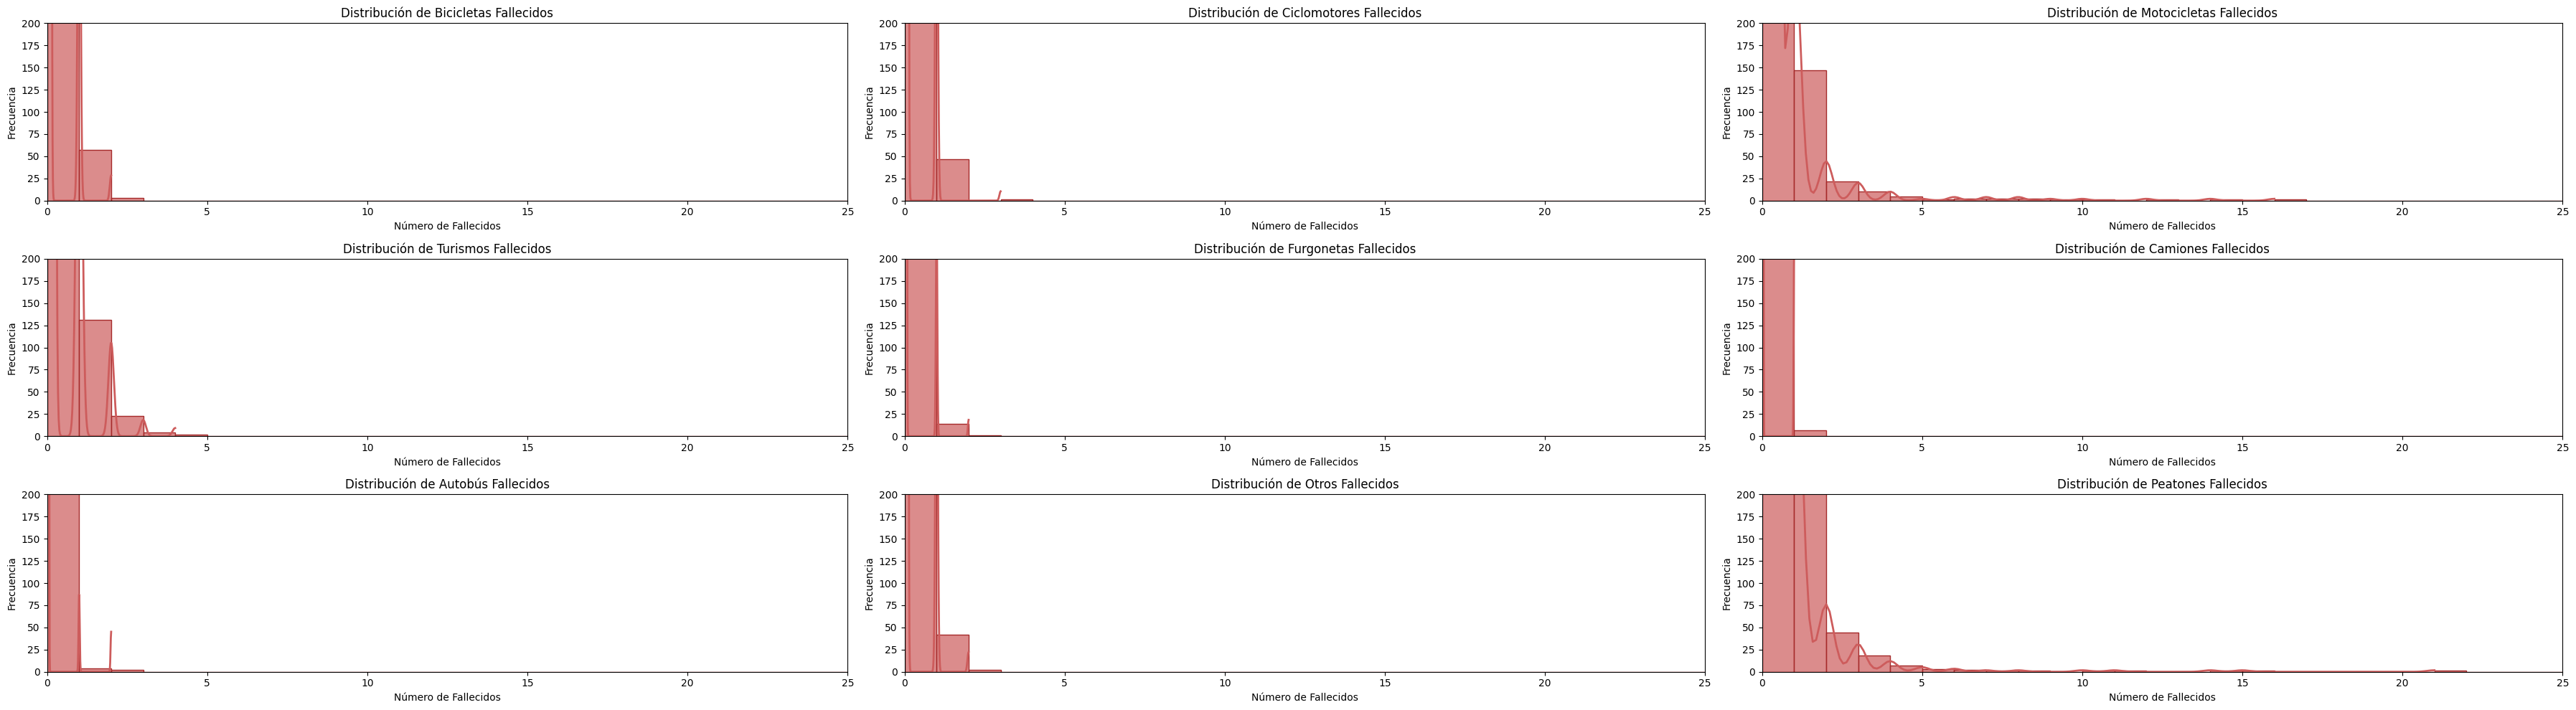

In [151]:
grupal_num_disc(dgt,columnas_fallecidos)

In [152]:
# Heridos
col_heridos=dgt.columns[dgt.columns.str.contains('Heridos')]

In [153]:
dgt.groupby("Anho")[col_heridos].sum().T

Anho,2020,2021,2022
Bicicletas Heridos Graves,374,393,394
Bicicletas Heridos Leves,4548,4986,5003
Ciclomotores Heridos Graves,265,305,333
Ciclomotores Heridos Leves,3921,4753,4877
Motocicletas Heridos Graves,1155,1412,1516
Motocicletas Heridos Leves,14389,17501,19516
Turismos Heridos Graves,342,440,453
Turismos Heridos Leves,18616,23953,24863
Furgonetas Heridos Graves,25,30,34
Furgonetas Heridos Leves,1237,1451,1542


RESUMEN NUMERICAS DISCRETAS

**Fallecidos**: Por suerte, los datos presentan muy pocos valores distintos de 0. La media está en 0.0522 Esto supone, que en el histograma no se aprecie más que un bloque al inicio, disparando la curva kde. En el gráfico de cajas todos los valores distintos de 0 representan outliers. Si hacemos una gráfica más cercana vemos que existen (pocos) valores distintos de 0.

**Población Total**: Los datos representan al conjunto de hombres y mujeres de cada municipio. Con una media de 5787 habitantes por municipio y un total de más de 47 millones. Hay valores de 0 en municipios vacíos y valores de más de 1 millon de habitantes en los casos de Madrid y Barcelona.

**Fallecidos Resumen**: En general describen el mismo comportamiento, con muy pocos valores. Siendo los peatones el grupo más afectado.

**Heridos Resumen**: Sin meternos mucho, podemos ver como el número de heridos, ya sean leves o graves han aumentado cada año.

### <span style="color:Lightsalmon">ANALISIS MULTIVARIANTE</span>

#### RELACION DE VARIABLES

In [154]:
# Evolucíon de la siniestralidad. ¿Afectó la pandemia?
dgt.groupby("Anho")["Fallecidos"].sum()

Anho
2020    395
2021    417
2022    473
Name: Fallecidos, dtype: int64

c:\Users\Martín Ámez Segovia\OneDrive\Desktop\REPOSITORIO\EDA_entrega\utils\Graficos.py:246: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=grouped_data.index, y=grouped_data.values, palette="magma")


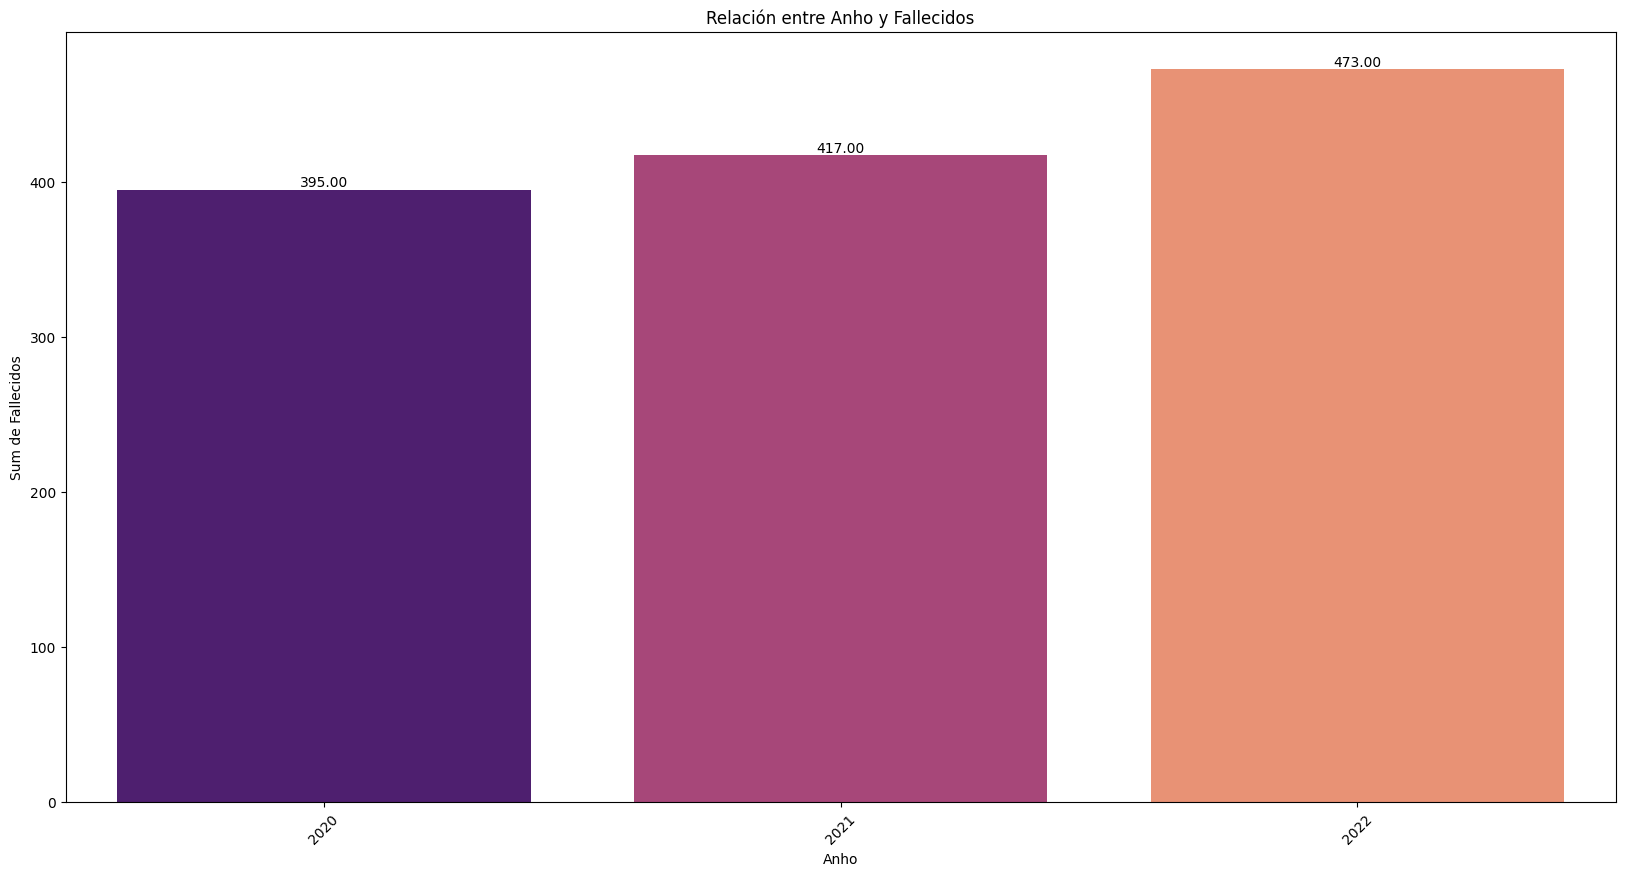

In [155]:
plot_cat_num(dgt,"Anho","Fallecidos",show_values=True,measure="sum")

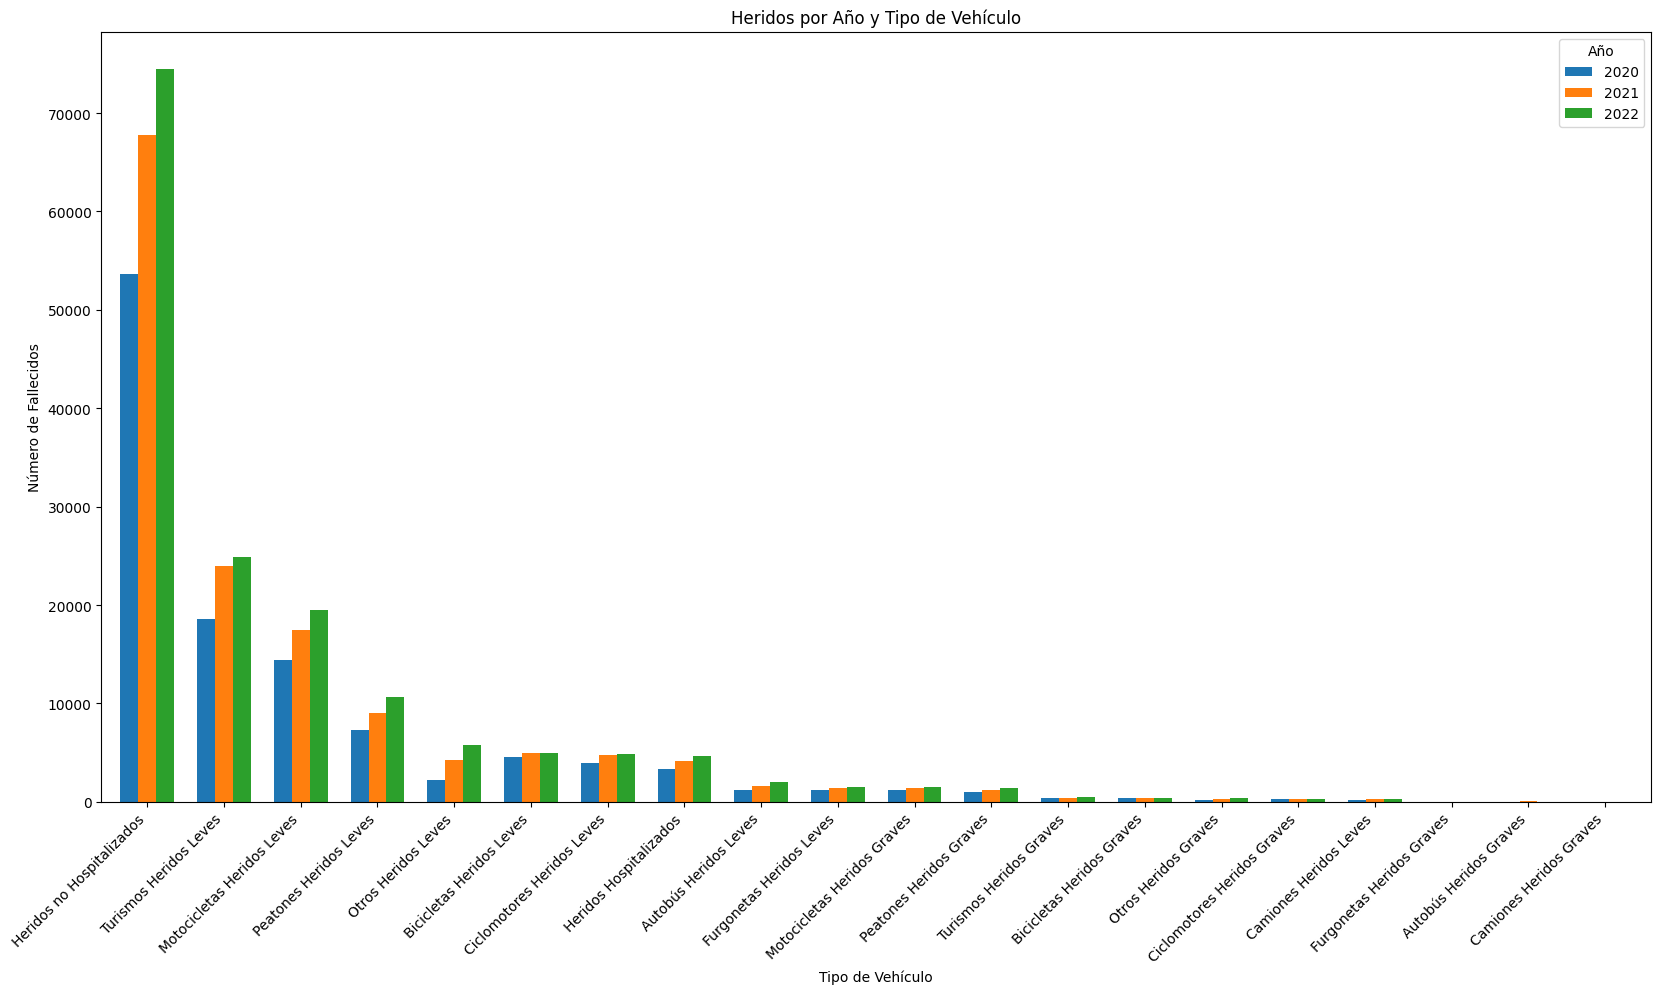

In [156]:
# Grafica Heridos
data= dgt.groupby("Anho")[col_heridos].sum().T
ax=data.sort_values(by=2022, ascending=False).plot(kind="bar", figsize=(20,10),width=0.7)
plt.title('Heridos por Año y Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Número de Fallecidos')
plt.legend(title='Año', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()

Evolución:

Los datos indican que sí existe relación con la pandemia, ya que el número de fallecidos en 2020 fue menor. Aunque no directamente por la conducción, si no por el confinamiento. Lo que podemos opinar a partir de los datos es que una vez terminado, el número de accidentes aumento y no sólo eso, ya que la tendencia siguió subiendo.

Hacemos una visual también a los heridos, ya sean leves o graves y observamos que todos los valores aumentaron año tras año, a excepción de los camiones y autobuses heridos graves que en 2022 redujeron sus victimas.

La evolución es negativa, empeoran los casos.

In [157]:
# En que municipios hubo más Fallecidos.
dgt.groupby(["Anho","Municipio"])["Fallecidos"].sum()

Anho  Municipio         
2020  Ababuj                0
      Abades                0
      Abadiño               0
      Abadía                0
      Abadín                0
                           ..
2022  Òrrius                0
      Ólvega                0
      Órgiva                0
      Úbeda                 0
      Úrbel del Castillo    0
Name: Fallecidos, Length: 24537, dtype: int64

In [158]:
# En que municipios hubo más Fallecidos.
dgt.loc[dgt["Anho"] == 2020].groupby(["Anho", "Municipio"])["Fallecidos"].sum().sort_values(ascending=False).head(10)

Anho  Municipio           
2020  Madrid                  44
      Barcelona               20
      Málaga                  12
      Valencia                10
      Zaragoza                 8
      Sevilla                  6
      Murcia                   6
      Castelló de la Plana     6
      Badajoz                  5
      Alicante/Alacant         5
Name: Fallecidos, dtype: int64

In [159]:
dgt.loc[dgt["Anho"] == 2021].groupby(["Anho", "Municipio"])["Fallecidos"].sum().sort_values(ascending=False).head(10)

Anho  Municipio                 
2021  Madrid                        36
      Barcelona                     24
      Málaga                        12
      Valencia                       8
      Sevilla                        7
      Murcia                         6
      Torrevieja                     6
      Alicante/Alacant               6
      San Cristóbal de La Laguna     5
      Arona                          5
Name: Fallecidos, dtype: int64

In [160]:
dgt.loc[dgt["Anho"] == 2022].groupby(["Anho", "Municipio"])["Fallecidos"].sum().sort_values(ascending=False).head(10)

Anho  Municipio       
2022  Madrid              28
      Barcelona           22
      Valencia            16
      Zaragoza            13
      Sevilla             11
      Badalona            11
      Alicante/Alacant     9
      Málaga               9
      Coruña, A            8
      Burgos               7
Name: Fallecidos, dtype: int64

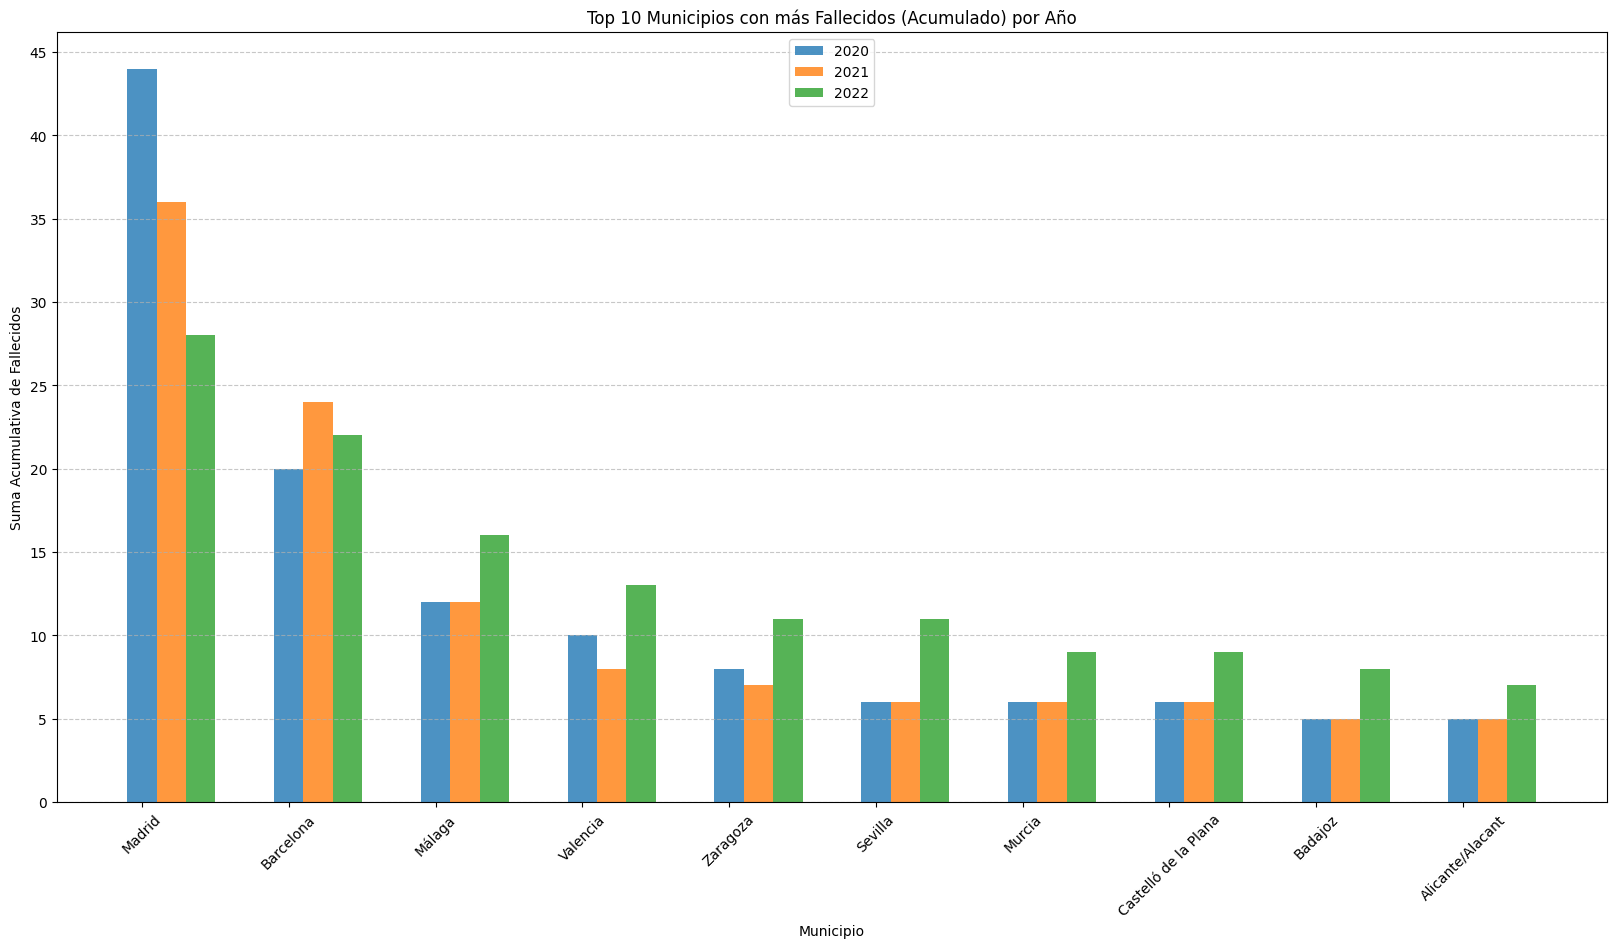

In [161]:
# Filtra y agrupa por año, municipio y suma los fallecidos para los años 2020, 2021 y 2022
grouped_data_2020 = dgt.loc[dgt["Anho"] == 2020].groupby(["Municipio"])["Fallecidos"].sum().reset_index()
grouped_data_2021 = dgt.loc[dgt["Anho"] == 2021].groupby(["Municipio"])["Fallecidos"].sum().reset_index()
grouped_data_2022 = dgt.loc[dgt["Anho"] == 2022].groupby(["Municipio"])["Fallecidos"].sum().reset_index()

# Ordeno de mayor a menor por la columna de "Fallecidos" y obtengo los 10 primeros para cada año
top_10_2020 = grouped_data_2020.sort_values(by="Fallecidos", ascending=False).head(10)
top_10_2021 = grouped_data_2021.sort_values(by="Fallecidos", ascending=False).head(10)
top_10_2022 = grouped_data_2022.sort_values(by="Fallecidos", ascending=False).head(10)

# Calculo acumulaciones por municipio
top_10_2020['Acumulado'] = top_10_2020['Fallecidos'].cumsum()
top_10_2021['Acumulado'] = top_10_2021['Fallecidos'].cumsum()
top_10_2022['Acumulado'] = top_10_2022['Fallecidos'].cumsum()

# Creo un gráfico de barras apiladas acumulativas por municipio para cada año
plt.figure(figsize=(20, 10))
bar_width = 0.2  # Ancho de cada barra
bar_padding = 0  # Espaciado entre barras de distintos años

# Calculo las posiciones de las barras
positions_2020 = range(len(top_10_2020))
positions_2021 = [pos + bar_width + bar_padding for pos in positions_2020]
positions_2022 = [pos + 2 * (bar_width + bar_padding) for pos in positions_2020]

# Graficar las barras
plt.bar(positions_2020, top_10_2020["Fallecidos"], width=bar_width, label='2020', alpha=0.8)
plt.bar(positions_2021, top_10_2021["Fallecidos"], width=bar_width, label='2021', alpha=0.8)
plt.bar(positions_2022, top_10_2022["Fallecidos"], width=bar_width, label='2022', alpha=0.8)

plt.title('Top 10 Municipios con más Fallecidos (Acumulado) por Año')
plt.xlabel('Municipio')
plt.ylabel('Suma Acumulativa de Fallecidos')
plt.yticks(range(0, 50, 5))  # Ajusta el rango y el paso según tus datos
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(positions_2020, top_10_2020["Municipio"], rotation=45)
plt.legend(loc="upper center")
plt.show()


In [162]:
dgt.loc[dgt["Anho"] == 2022].groupby(["Anho", "Municipio"])["Población Total"].sum().sort_values(ascending=False).head(30)

Anho  Municipio                  
2022  Madrid                         3280782
      Barcelona                      1636193
      Valencia                        792492
      Sevilla                         681998
      Zaragoza                        673010
      Málaga                          579076
      Murcia                          462979
      Palma de Mallorca               415940
      Palmas de Gran Canaria, Las     378797
      Bilbao                          344127
      Alicante/Alacant                338577
      Córdoba                         319515
      Valladolid                      295639
      Vigo                            292374
      Gijón                           267706
      Hospitalet de Llobregat, L'     265444
      Vitoria-Gasteiz                 253672
      Coruña, A                       244700
      Elche/Elx                       235580
      Granada                         228682
      Terrassa                        224114
      Badalona       

Más accidentes por municipio:

Los municipios con más fallecidos coinciden con los más poblados, más de 300 mil habitantes, a excepción de ``Castelló de la Plana`` y ``Badajoz`` que tienen 174 mil y 150 mil respectivamente. Estos municipios no están entre los 30 más poblados y sin embargo representan una gran sinientralidad.

Del gráfico tambien podemos observar un descenso, en el municipio de Madrid. Contrariamente a lo que se veía en la grafica de fallecidos-años.

In [163]:
# En que comunidad hubo más Fallecidos.
dgt.groupby(["Anho","Comunidad Autónoma"])["Fallecidos"].sum().sort_values(ascending=False)

Anho  Comunidad Autónoma          
2022  Andalucía                       88
      Cataluña                        86
2021  Cataluña                        85
2020  Cataluña                        81
2021  Andalucía                       76
2022  Comunitat Valenciana            58
2020  Madrid (Comunidad de)           57
2021  Madrid (Comunidad de)           55
2020  Andalucía                       53
2021  Comunitat Valenciana            48
2022  Madrid (Comunidad de)           47
2020  Comunitat Valenciana            42
2022  Castilla y León                 31
      Galicia                         28
2020  Castilla y León                 27
2022  País Vasco                      26
2021  Canarias                        25
2020  Canarias                        25
2021  Castilla y León                 25
2022  Canarias                        24
2020  Galicia                         24
2021  Galicia                         20
      País Vasco                      17
      Murcia (Región d

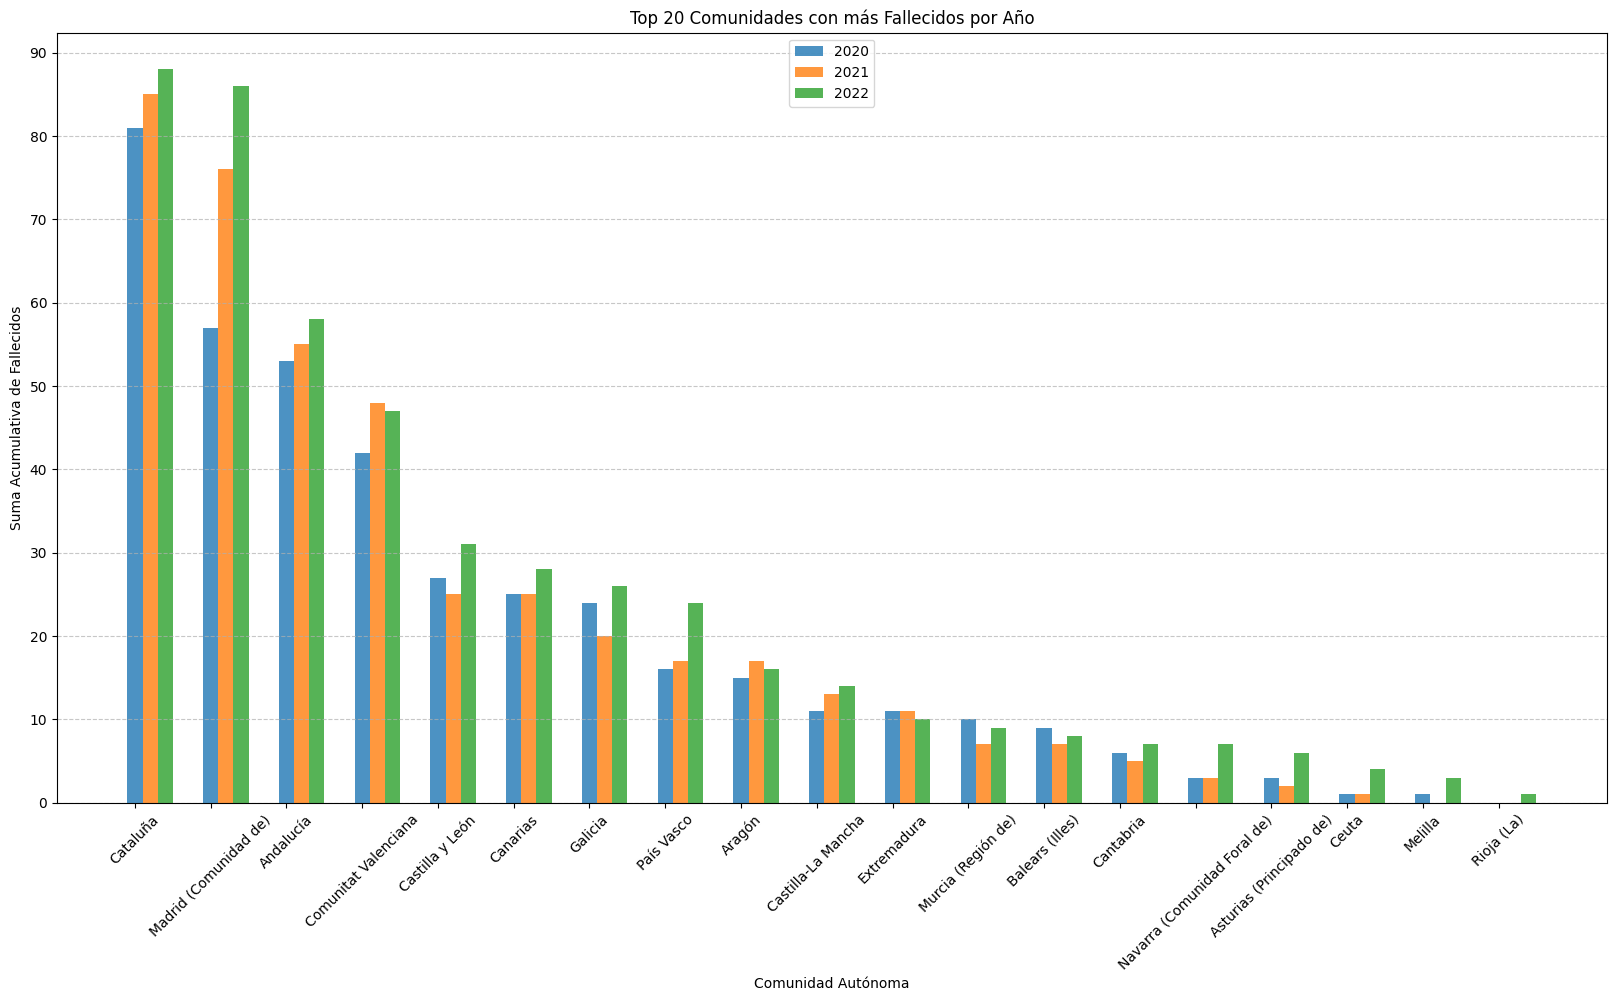

In [164]:
# Hacemos lo mismo para las comunidades
grouped_data_2020 = dgt.loc[dgt["Anho"] == 2020].groupby(["Comunidad Autónoma"])["Fallecidos"].sum().reset_index()
grouped_data_2021 = dgt.loc[dgt["Anho"] == 2021].groupby(["Comunidad Autónoma"])["Fallecidos"].sum().reset_index()
grouped_data_2022 = dgt.loc[dgt["Anho"] == 2022].groupby(["Comunidad Autónoma"])["Fallecidos"].sum().reset_index()

# Ordenar de mayor a menor por la columna de "Fallecidos" y obtener los 20 primeros para cada año
top_20_2020 = grouped_data_2020.sort_values(by="Fallecidos", ascending=False).head(20)
top_20_2021 = grouped_data_2021.sort_values(by="Fallecidos", ascending=False).head(20)
top_20_2022 = grouped_data_2022.sort_values(by="Fallecidos", ascending=False).head(20)

# Calcular acumulativos por comunidad
top_20_2020['Acumulado'] = top_20_2020['Fallecidos'].cumsum()
top_20_2021['Acumulado'] = top_20_2021['Fallecidos'].cumsum()
top_20_2022['Acumulado'] = top_20_2022['Fallecidos'].cumsum()

# Crear un gráfico de barras apiladas acumulativas por municipio para los años 2020, 2021 y 2022
plt.figure(figsize=(20, 10))
bar_width = 0.2  # Ancho de cada barra
bar_padding = 0  # Espaciado entre barras de distintos años

# Calcular las posiciones de las barras
positions_2020 = range(len(top_20_2020))
positions_2021 = [pos + bar_width + bar_padding for pos in positions_2020]
positions_2022 = [pos + 2 * (bar_width + bar_padding) for pos in positions_2020]

# Graficar las barras
plt.bar(positions_2020, top_20_2020["Fallecidos"], width=bar_width, label='2020', alpha=0.8)
plt.bar(positions_2021, top_20_2021["Fallecidos"], width=bar_width, label='2021', alpha=0.8)
plt.bar(positions_2022, top_20_2022["Fallecidos"], width=bar_width, label='2022', alpha=0.8)

plt.title('Top 20 Comunidades con más Fallecidos por Año')
plt.xlabel('Comunidad Autónoma')
plt.ylabel('Suma Acumulativa de Fallecidos')
plt.yticks(range(0, 100, 10))  # Ajusta el rango y el paso según tus datos
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(positions_2020, top_20_2020["Comunidad Autónoma"], rotation=45)
plt.legend(loc="upper center")
plt.show()

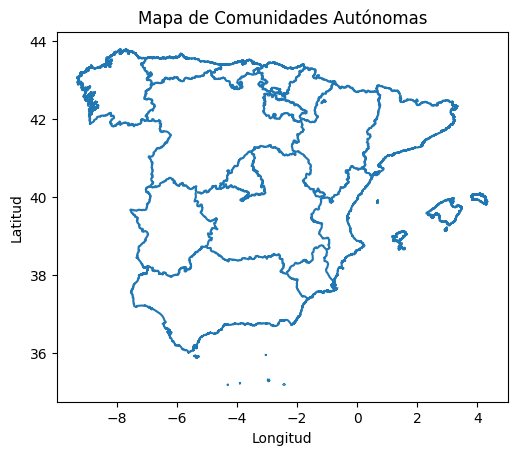

In [165]:
import geopandas as gpd

# Especifica la ruta del archivo Shapefile
ruta_shapefile = ruta_shapefile = 'C:/Users/Martín Ámez Segovia/OneDrive/Desktop/REPOSITORIO/EDA_entrega/data/lineas_limite/SHP_ETRS89/ll_autonomicas_inspire_peninbal_etrs89/ll_autonomicas_inspire_peninbal_etrs89.shp'


# Lee el archivo Shapefile con geopandas
datos_geoespaciales = gpd.read_file(ruta_shapefile)

# Muestra los primeros registros del DataFrame resultante
# Visualiza el mapa
datos_geoespaciales.plot()
plt.title('Mapa de Comunidades Autónomas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

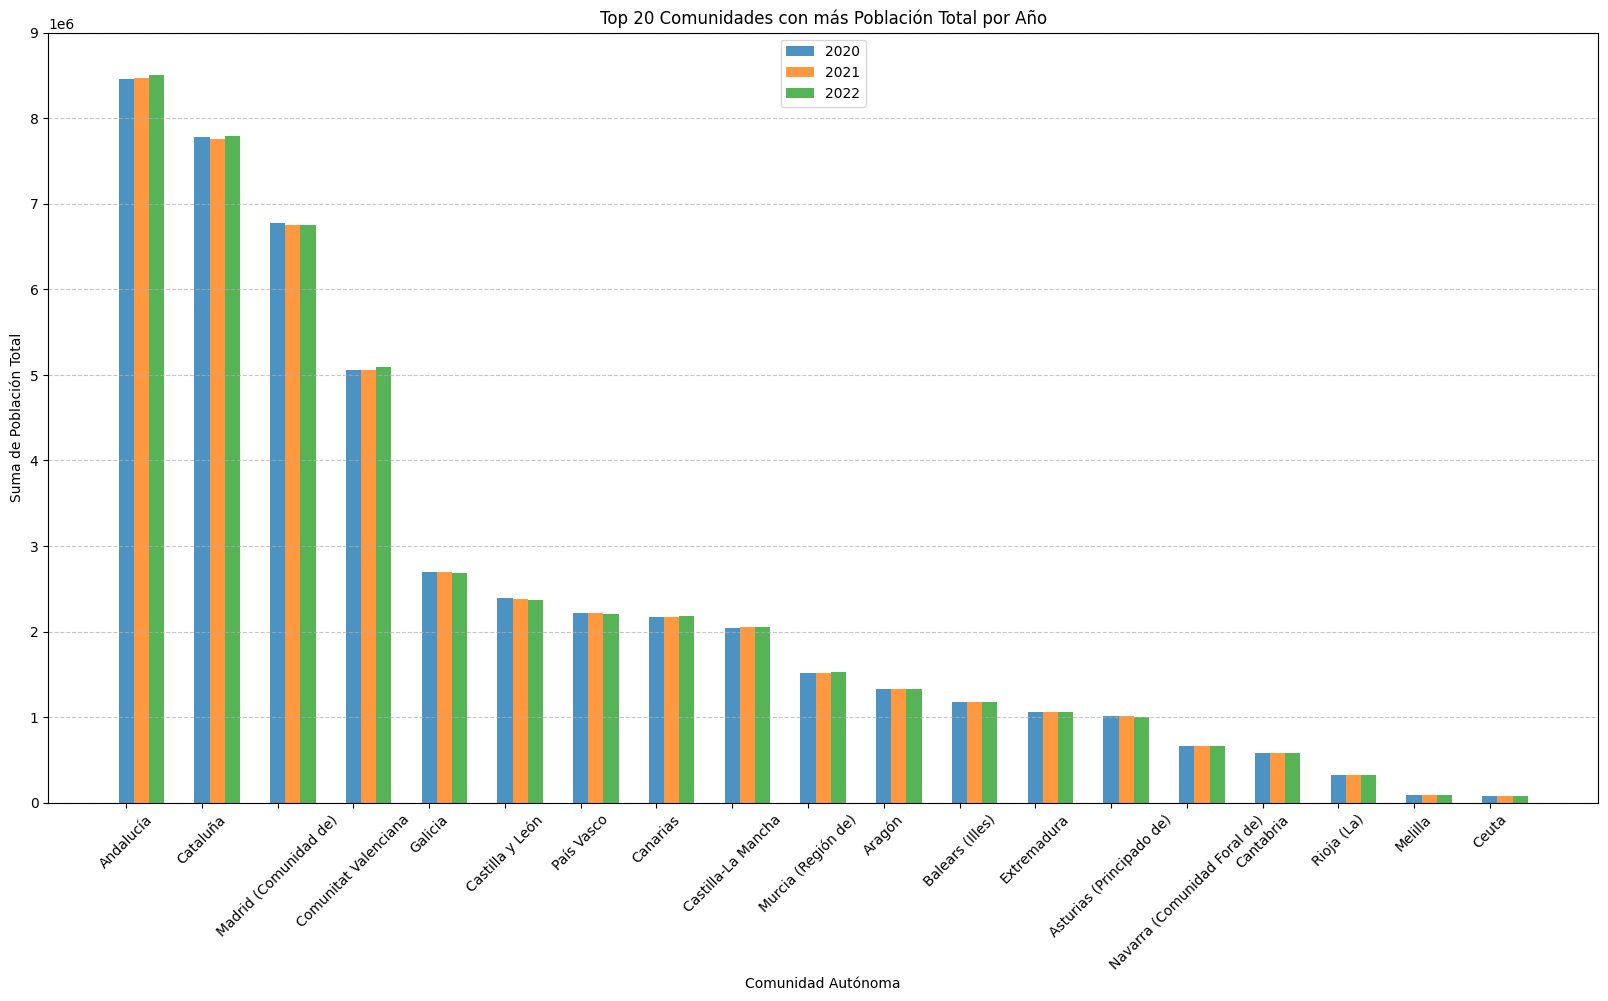

In [166]:
# Hacemos lo mismo para las comunidades
grouped_data_2020 = dgt.loc[dgt["Anho"] == 2020].groupby(["Comunidad Autónoma"])["Población Total"].sum().reset_index()
grouped_data_2021 = dgt.loc[dgt["Anho"] == 2021].groupby(["Comunidad Autónoma"])["Población Total"].sum().reset_index()
grouped_data_2022 = dgt.loc[dgt["Anho"] == 2022].groupby(["Comunidad Autónoma"])["Población Total"].sum().reset_index()

# Ordenar de mayor a menor por la columna de "Población Total" y obtener los 20 primeros para cada año
top_20_2020 = grouped_data_2020.sort_values(by="Población Total", ascending=False).head(20)
top_20_2021 = grouped_data_2021.sort_values(by="Población Total", ascending=False).head(20)
top_20_2022 = grouped_data_2022.sort_values(by="Población Total", ascending=False).head(20)

# Calcular acumulativos por comunidad
top_20_2020['Acumulado'] = top_20_2020['Población Total'].cumsum()
top_20_2021['Acumulado'] = top_20_2021['Población Total'].cumsum()
top_20_2022['Acumulado'] = top_20_2022['Población Total'].cumsum()

# Crear un gráfico de barras apiladas acumulativas por municipio para los años 2020, 2021 y 2022
plt.figure(figsize=(20, 10))
bar_width = 0.2  # Ancho de cada barra
bar_padding = 0  # Espaciado entre barras de distintos años

# Calcular las posiciones de las barras
positions_2020 = range(len(top_20_2020))
positions_2021 = [pos + bar_width + bar_padding for pos in positions_2020]
positions_2022 = [pos + 2 * (bar_width + bar_padding) for pos in positions_2020]

# Graficar las barras
plt.bar(positions_2020, top_20_2020["Población Total"], width=bar_width, label='2020', alpha=0.8)
plt.bar(positions_2021, top_20_2021["Población Total"], width=bar_width, label='2021', alpha=0.8)
plt.bar(positions_2022, top_20_2022["Población Total"], width=bar_width, label='2022', alpha=0.8)

plt.title('Top 20 Comunidades con más Población Total por Año')
plt.xlabel('Comunidad Autónoma')
plt.ylabel('Suma de Población Total')
plt.yticks(range(0, 10000000, 1000000))  # Ajusta el rango y el paso según tus datos
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(positions_2020, top_20_2020["Comunidad Autónoma"], rotation=45)
plt.legend(loc="upper center")
plt.show()

Más accidentes por comunidad:

Si hacemos el mismo análisis, sí que vemos como en la mayoría de comunidades se mantiene ese aumento de la siniestralidad. Además la comunidad que más fallecidos acumula es ``Cataluña, seguida de Madrid y Andalucía``. Mientras que las que menos son ``La Rioja, las ciudad-estado, (Ceuta y Melilla), Asturias y Navarra.``

Si recordamos uno de los gráficos anteriores, veíamos que Castilla La Mancha, era la comunidad con más municipios, seguido de Cataluña y Castilla y León. Podemos confirmar, que la siniestralidad no depende del número de municipios de una comunidad, si no, que está ligado al número de habitantes de una población. En la gráfica anterior podemos ver que coinciden las comunidades con mayor población con las comunidades con mayor tasa de fallecidos (Cataluña, Andalucia, Madrid)

In [167]:
# ¿Qué colectivo está más involucrado en la siniestralidad?
dgt.groupby("Anho")[columnas_fallecidos].sum().T

Anho,2020,2021,2022
Bicicletas Fallecidos,21,21,21
Ciclomotores Fallecidos,13,21,16
Motocicletas Fallecidos,121,102,126
Turismos Fallecidos,64,66,67
Furgonetas Fallecidos,4,6,6
Camiones Fallecidos,2,1,4
Autobús Fallecidos,2,4,2
Otros Fallecidos,15,13,18
Peatones Fallecidos,153,183,213


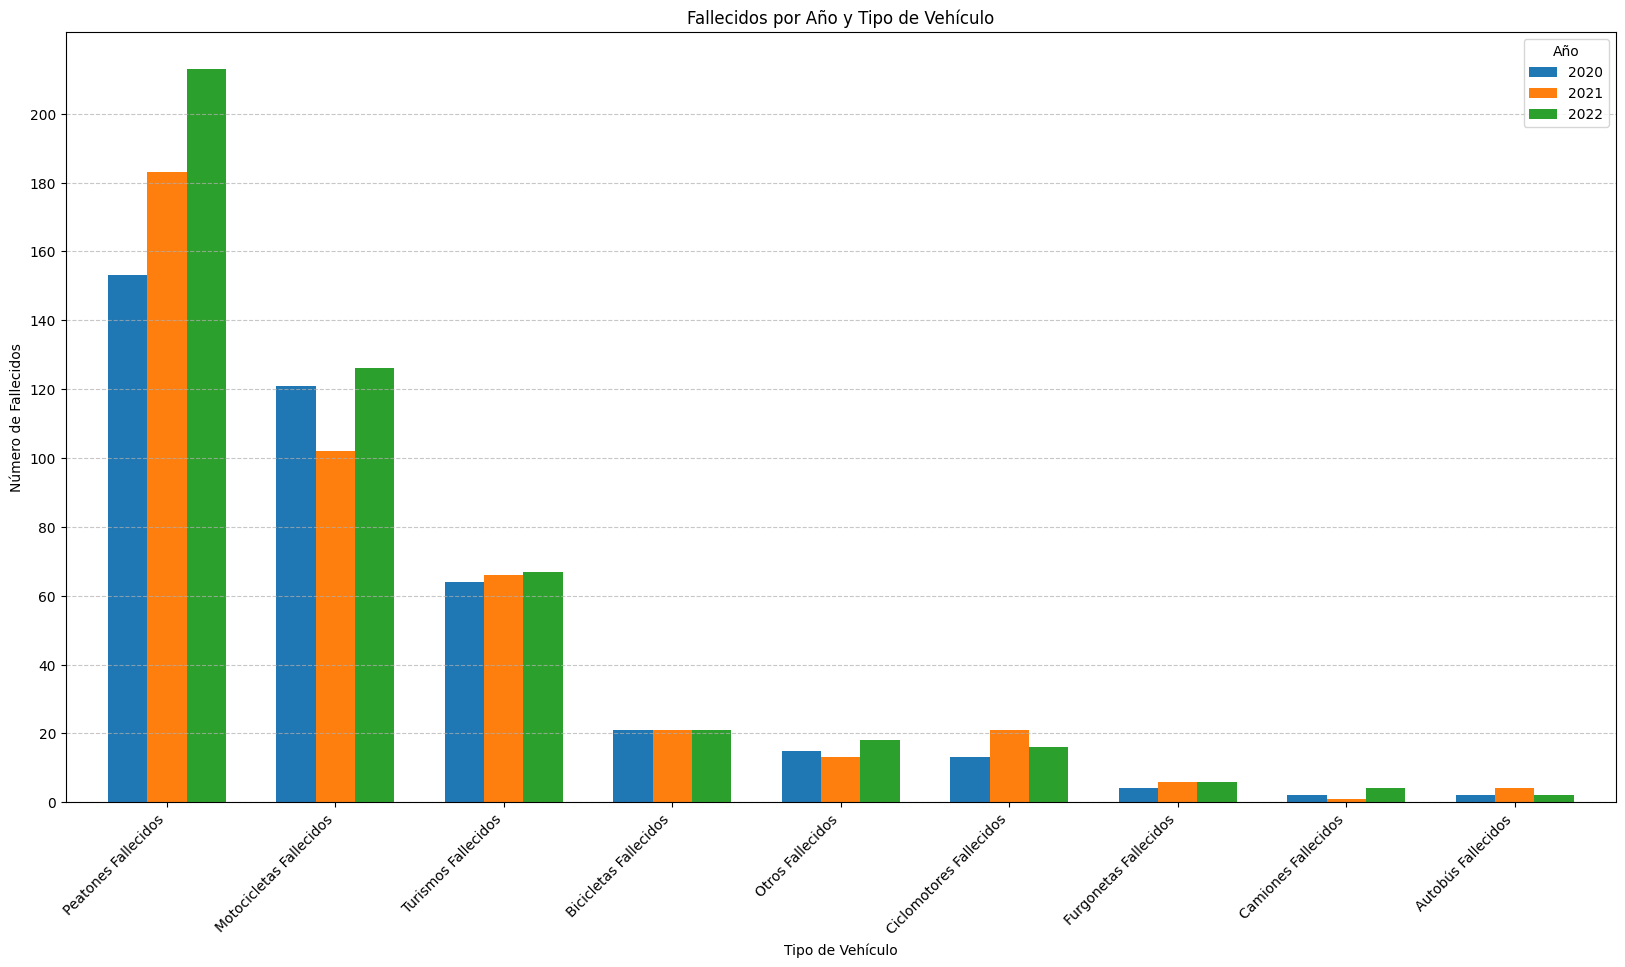

In [168]:
# Grafica Fallecidos
data=dgt.groupby("Anho")[columnas_fallecidos].sum().T
ax = data.sort_values(by=2022, ascending=False).plot(kind='bar', figsize=(20, 10), width=0.7)
plt.title('Fallecidos por Año y Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Número de Fallecidos')
plt.yticks(range(0, 220, 20))  # Ajusta el rango y el paso según tus datos
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Año', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()

Colectivo más afectado:

Los ``Peatones`` son los más afectados, con el ``mayor número de victimas al año``, seguido de los motocicletas y los turismos. Además es el colectivo que cada año, tiene más fallecidos.

Por otra parte, los fallecidos en ``autobús, camiones y furgonetas``, son los que presentan ``menos victimas``.

In [169]:
# Impacto de la edad de un vehículo.
dgt.groupby("Anho")[col_anti].mean().T.round(2)

Anho,2020,2021,2022
Antigüedad Media del Parque (<25 años),13.45,13.78,14.14
Antigüedad Media de Ciclomotores,17.79,18.60,19.44
Antigüedad Media de Motocicletas,11.86,12.19,12.54
Antigüedad Media de Turismos,12.77,13.08,13.44
Antigüedad Media de Furgonetas,14.63,14.79,15.05
Antigüedad Media de Camiones,14.97,15.38,15.81


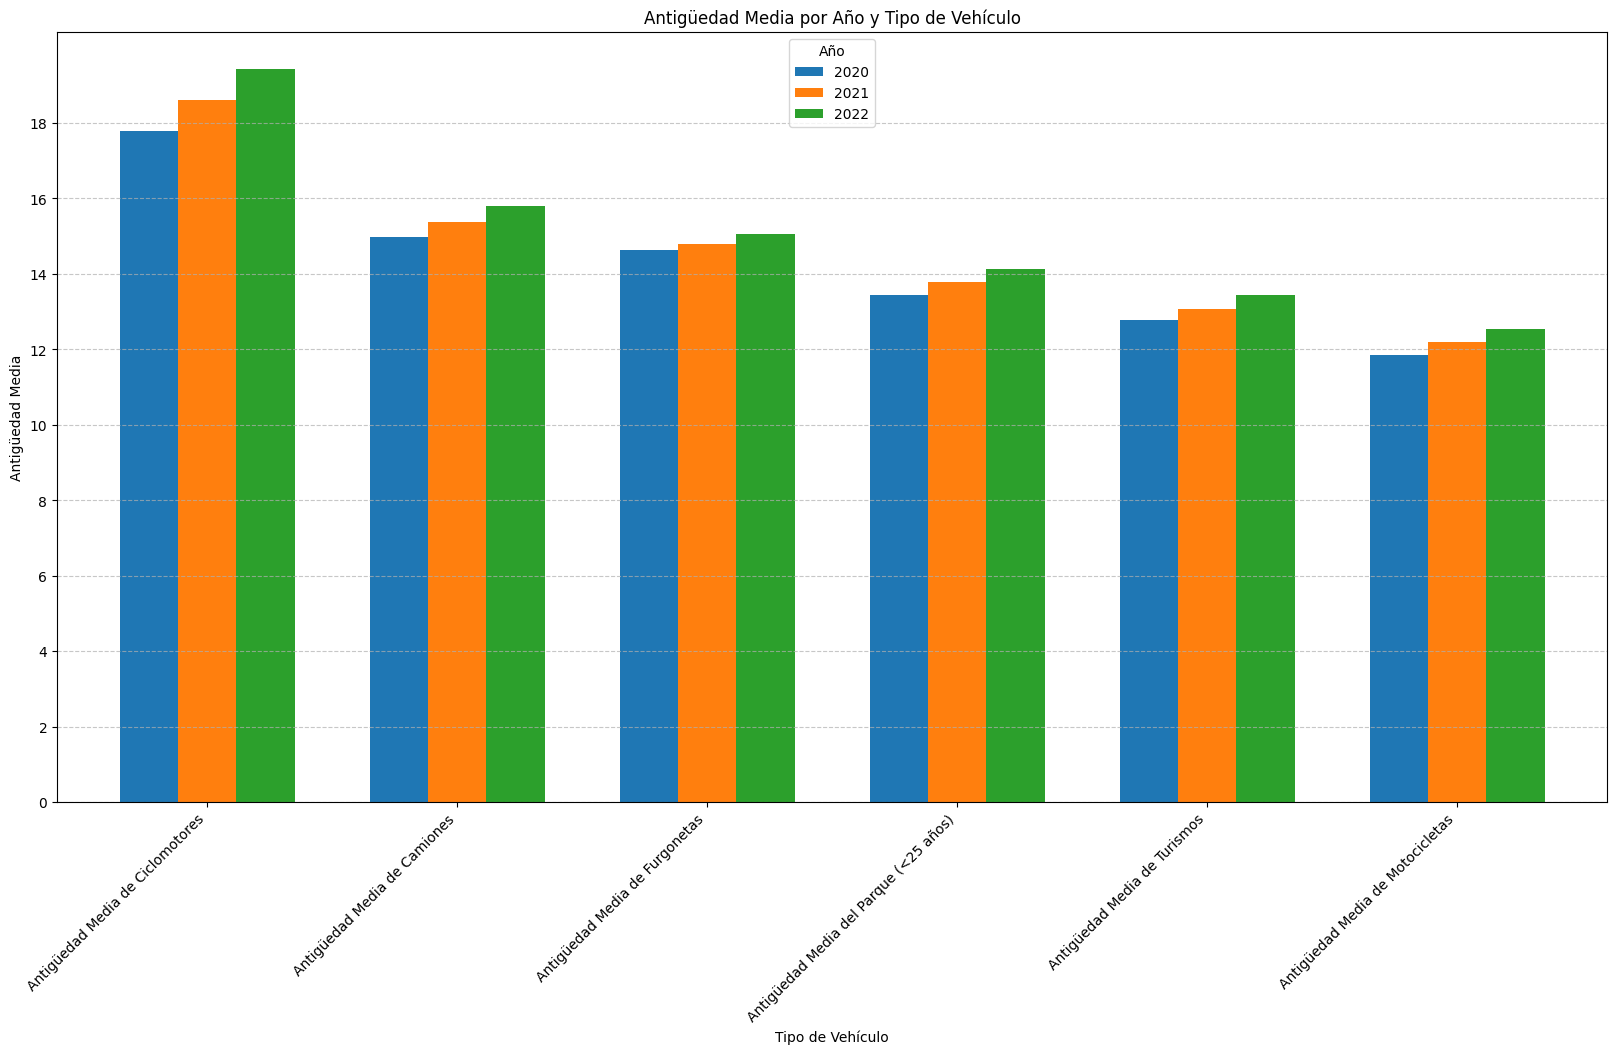

In [170]:
# Grafico de Antigüedad Vehiculos
data_anti=dgt.groupby("Anho")[col_anti].mean().T.round(2)
ax = data_anti.sort_values(by=2022, ascending=False).plot(kind='bar', figsize=(20, 10), width=0.7)
plt.title('Antigüedad Media por Año y Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Antigüedad Media')
plt.yticks(range(0, 20, 2))  # Ajusta el rango y el paso según tus datos
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Año', loc='upper center')
plt.xticks(rotation=45, ha='right')
plt.show()

In [233]:
dgt.groupby('Comunidad Autónoma')[col_anti].mean().round(2).sort_values(by="Antigüedad Media de Camiones", ascending=False)

,Antigüedad Media del Parque (<25 años),Antigüedad Media de Ciclomotores,Antigüedad Media de Motocicletas,Antigüedad Media de Turismos,Antigüedad Media de Furgonetas,Antigüedad Media de Camiones
Comunidad Autónoma,,,,,,
Melilla,13.51,16.71,9.67,13.09,16.05,17.58
Castilla-La Mancha,14.54,18.60,12.80,13.74,15.94,16.16
Castilla y León,14.46,19.06,12.61,13.98,15.31,15.85
Ceuta,12.60,15.54,9.82,12.74,15.39,15.79
Galicia,14.01,19.02,12.55,13.51,13.83,15.72
Extremadura,14.60,18.70,12.51,13.87,15.98,15.72
Asturias (Principado de),13.97,18.82,12.21,13.31,15.19,15.65
Rioja (La),14.19,19.08,12.34,13.42,15.94,15.47
Andalucía,13.90,18.34,11.78,13.06,15.13,15.43


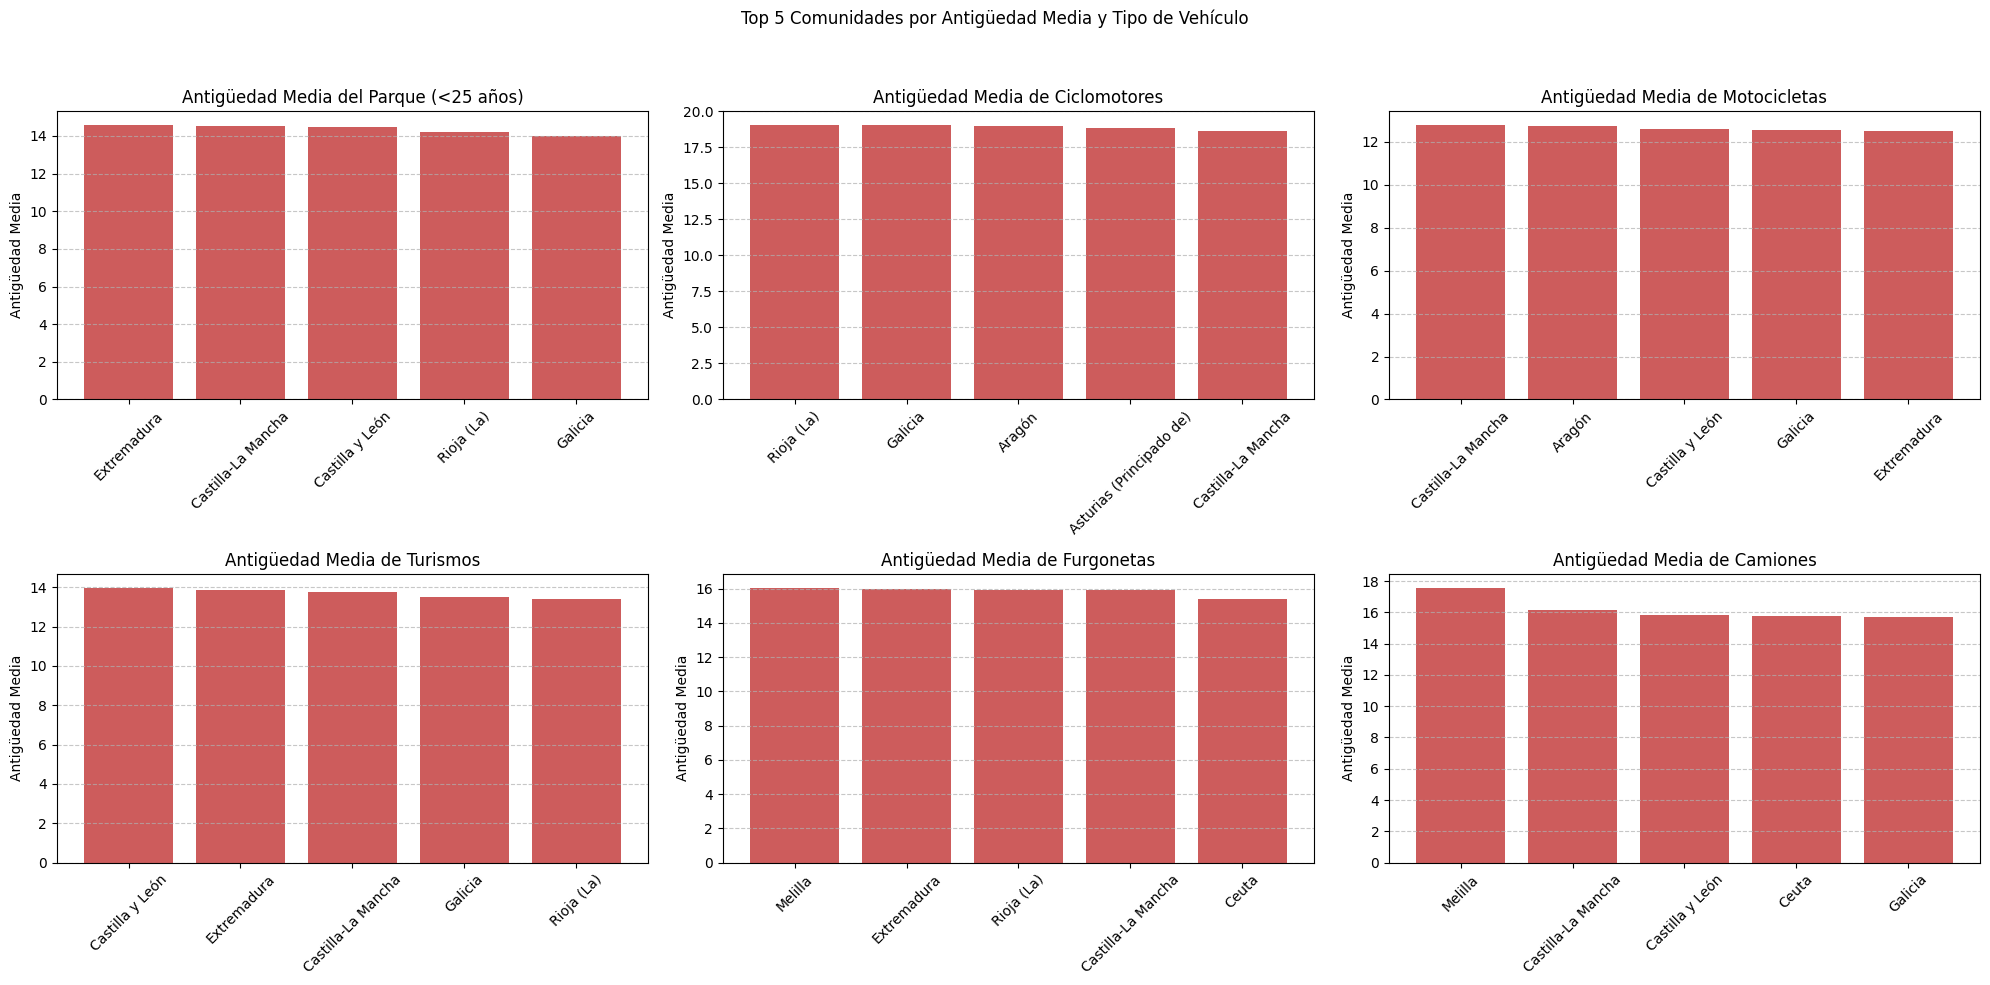

In [241]:
data_anti = dgt.groupby('Comunidad Autónoma')[col_anti].mean().round(2)

# Top 5 values for different "Antigüedad Media" categories
top_values = {
    'Antigüedad Media del Parque (<25 años)': 'Extremadura, Castilla-La Mancha, Castilla y León, Rioja (La), Galicia',
    'Antigüedad Media de Ciclomotores': 'Rioja (La), Castilla-La Mancha, Galicia, Aragón, Asturias (Principado de)',
    'Antigüedad Media de Motocicletas': 'Castilla-La Mancha, Aragón, Castilla y León, Galicia, Extremadura',
    'Antigüedad Media de Turismos': 'Castilla y León, Extremadura, Castilla-La Mancha, Galicia, Rioja (La)',
    'Antigüedad Media de Furgonetas': 'Melilla, Extremadura, Rioja (La), Castilla-La Mancha, Ceuta',
    'Antigüedad Media de Camiones': 'Melilla, Castilla-La Mancha, Castilla y León, Ceuta, Galicia'
}

#  subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.suptitle('Top 5 Comunidades por Antigüedad Media y Tipo de Vehículo')

for i, (column, top_comunidades) in enumerate(top_values.items()):
    ax = axes[i // 3, i % 3]
    top_comunidades_list = top_comunidades.split(', ')
    data_subset = data_anti.loc[top_comunidades_list]
    data_subset = data_subset.sort_values(by=column, ascending=False)

    ax.bar(data_subset.index, data_subset[column], color='indianred')
    ax.set_title(column)
    ax.set_ylabel('Antigüedad Media')
    ax.tick_params(axis='x', rotation=45)
    
    # Add grid to each subplot
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.yticks(range(0, 20, 2))
plt.show()

Factor Antigüedad:

Como es esperado, la tendencia de la antigüedad para cada colectivo, aumenta con el tiempo. Esto supone, que no hay tanta renovación de vehículos como descarte de utilitarios.

Se podría pensar que, los vehículos más antiguos son más propensos a tener víctimas, pero este gráfico nos dice los contrario, ya que ``los ciclomotores, camiones y furgonetas`` son los vehículos con media de edad más alta y los colectivos que menos fallecidos tienen.

Practicamente las comunidades con mayor edad de vehículo coninciden, son: ``Castilla y León, Castilla-La Mancha, Galicia, Extremadura, La Rioja y Aragón``. Y ninguna de ellas está en la cabeza de fallecidos, que recordamos Cataluña, Madrid y Andalucía. No hay una clara relación entre la antigüedad y los fallecidos.

In [ ]:
#Otros datos de interes.

Otros datos:

España pasó de ser la cuarta tasa más baja de la unión europea en 2020, a la séptima en 2021, y en 2022 fue la décima.
datos de: 'RANKING EU PROGRESS ON ROAD SAFETY'

Evolución de fallecidos en accidentes de tráfico, desde 1960-2020.

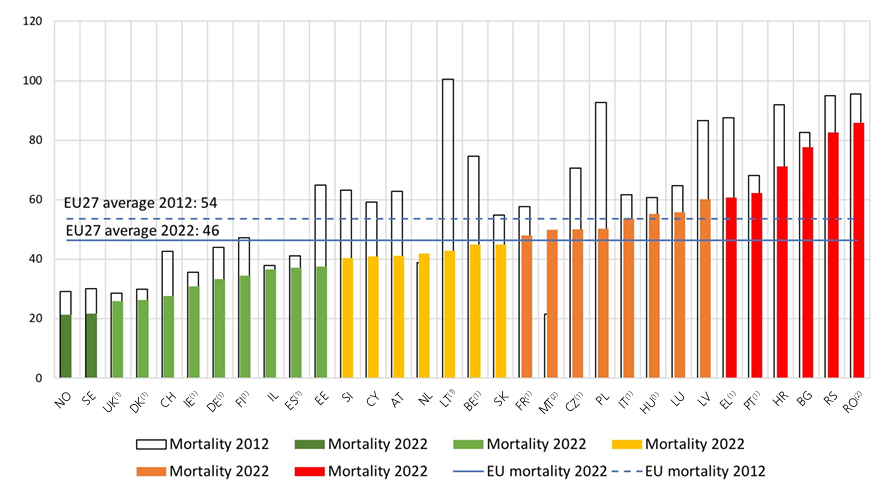

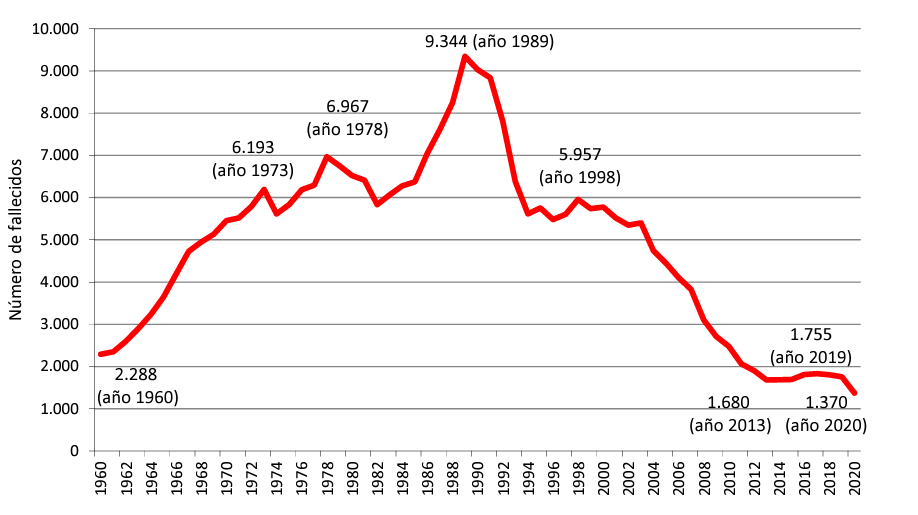

### <span style="color:Lightsalmon">CONCLUSIONES</span>

* España, en los primeros puestos en la lista de la UE de menos fallecidos en accidentes de tráfico, empeora año tras año en vías urbanas.

* Los peatones son el colectivo más afectado y el que más crece cada año:
En 2020 fue un 38% , en 2021 fue 44% , y en 2022 representó el 45%.

* En las vías urbanas, de los fallecidos el 80% son usuarios vulnerables (153 peatones, 21 ciclistas, 7 usuarios de vehículos de movilidad personal y 134 motoristas) en 2020

* Las distracciones y la velocidad, principal causa de mortalidad.

* La antigüedad del vehículo no es un factor clave en la tasa de mortalidad.

* La siniestralidad aumenta en las comunidades con mayor población. Si nos enfocamos en los municipios, en general tambien sigue esa pauta aunque con casos como Castelló de la Plana y Badajoz que se cuelan. 